In [1]:
import sys
sys.path.append('../..')

In [2]:
from typing import List, Tuple

In [3]:
from survival_tests.schedule import survival_curve_from_schedule, termination_curve_from_train_data
from survival_tests.survival_curves import prepare_survival_curves_for_plot, plot_survival_funcs, create_scenario, create_survival_curves

In [4]:
import os

root='../data/aslib_data-master/'
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]

Optional file not found: ..\..\survival_tests\results\workspaces\aslib\QBF-2011\ground_truth.arff
Optional file not found: ..\..\survival_tests\results\workspaces\aslib\QBF-2011\feature_costs.arff
Have not found features_cutoff_time
Have not found features_cutoff_memory
Have not found features_stochastic
Found 114 duplicated feature vectors
Index(['C880.blif_0.10_0.20_0_0_out_exact',
       'C880.blif_0.10_0.20_0_1_out_exact',
       'Core1108_tbm_02.tex.moduleQ3.2S.000007',
       'Core1108_tbm_02.tex.moduleQ3.2S.000077',
       'Core1108_tbm_02.tex.moduleQ3.2S.000099',
       'Core1108_tbm_02.tex.moduleQ3.2S.000108',
       'Core1108_tbm_03.tex.module.000038',
       'Core1108_tbm_03.tex.module.000039',
       'Core1108_tbm_03.tex.moduleQ3.2S.000002',
       'Core1108_tbm_03.tex.moduleQ3.2S.000009',
       ...
       'robots_1_5_5_8.4', 'robots_1_5_5_87.4', 'robots_1_5_5_93.4',
       'robots_1_5_5_95.8', 'robots_1_5_5_97.2', 'robots_1_5_5_99.8',
       'test1_quant2', 'test1_quant_s

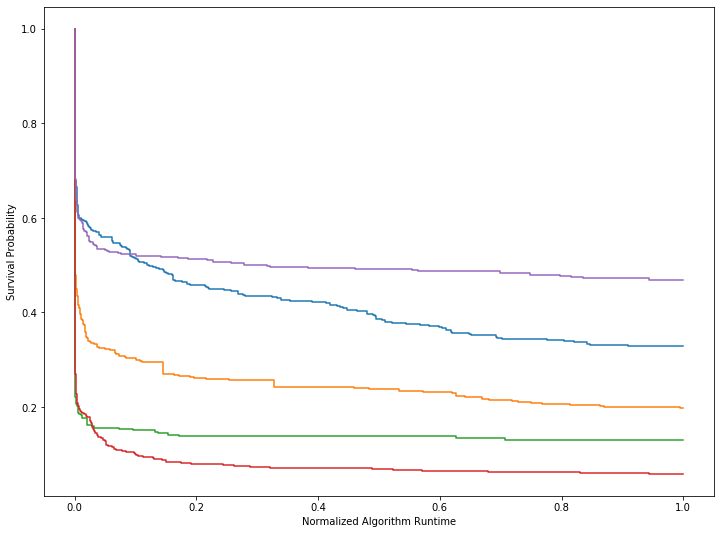

In [5]:
scenario_name = 'QBF-2011'
instance_id = 0

scenario = create_scenario(scenario_name, '../../survival_tests/results/workspaces/aslib/')

EVENT_TIMES, SURVIVAL_FUNCTIONS, cutoff = create_survival_curves(scenario, instance_id)
plot_survival_funcs(EVENT_TIMES, SURVIVAL_FUNCTIONS, cutoff)

../..\survival_tests\survival_curves.py:139: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
../..\survival_tests\survival_curves.py:139: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
../..\survival_tests\survival_curves.py:139: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
../..\survival_tests\survival_curves.py:139: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
../..\survival_tests\survival_curves.py:139: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
../..\survival_

IndexError: index 136 is out of bounds for axis 0 with size 136

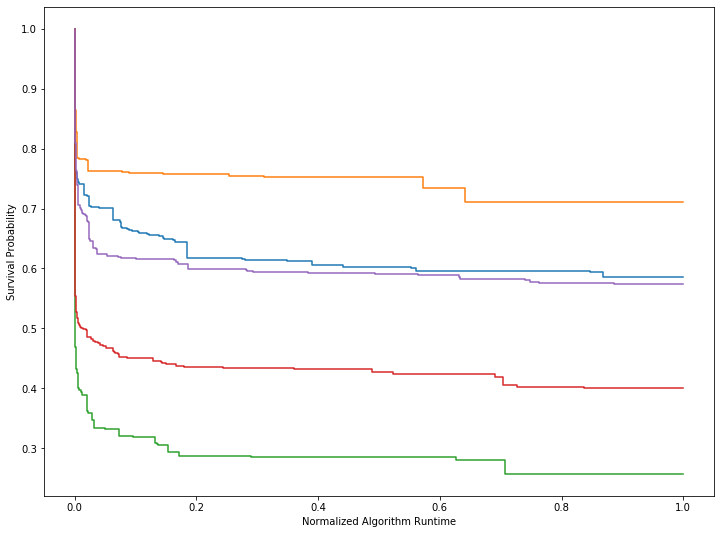

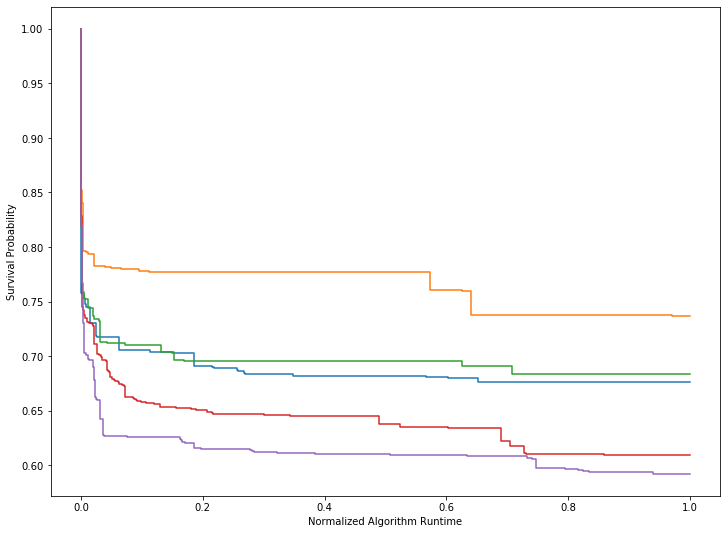

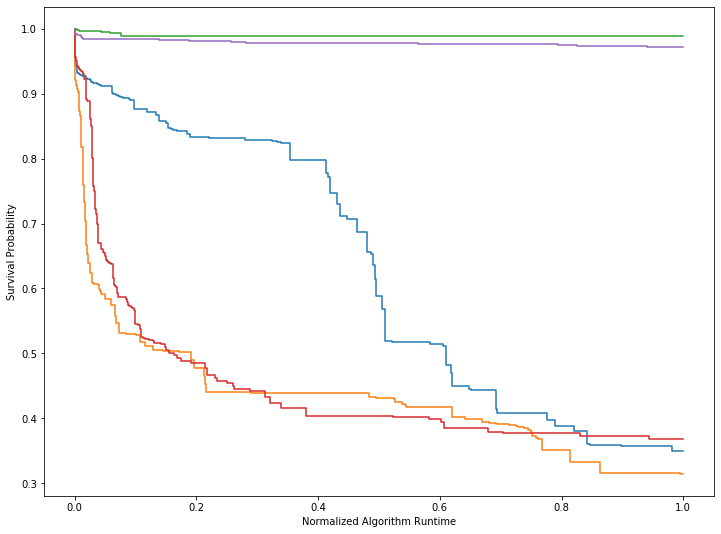

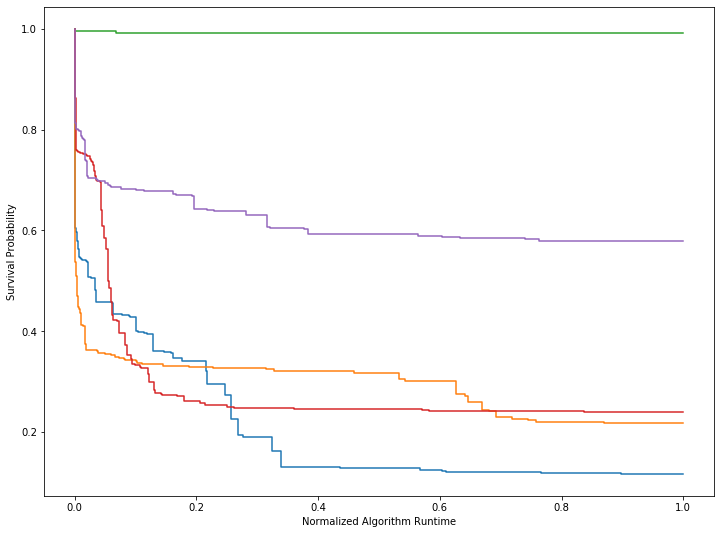

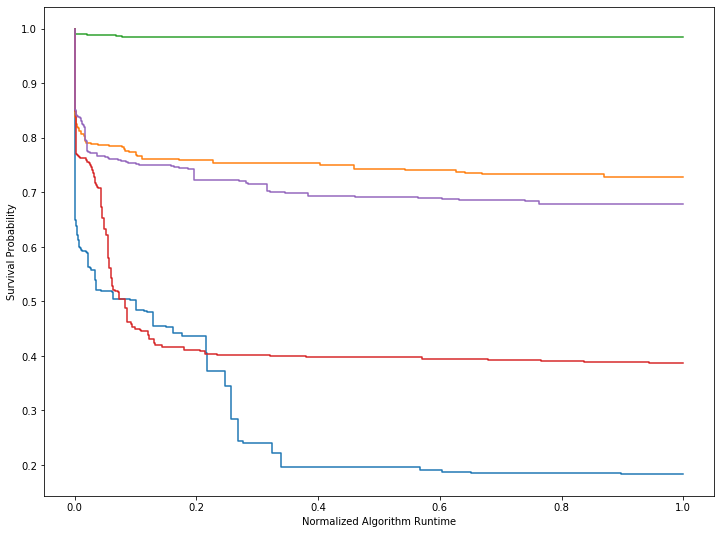

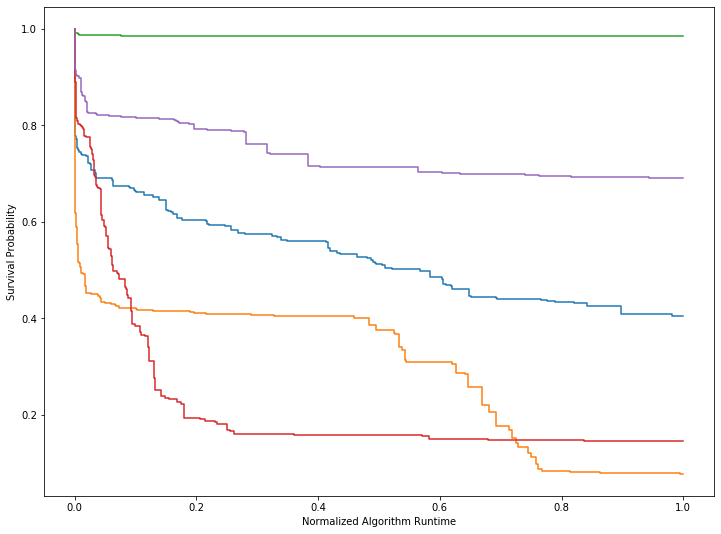

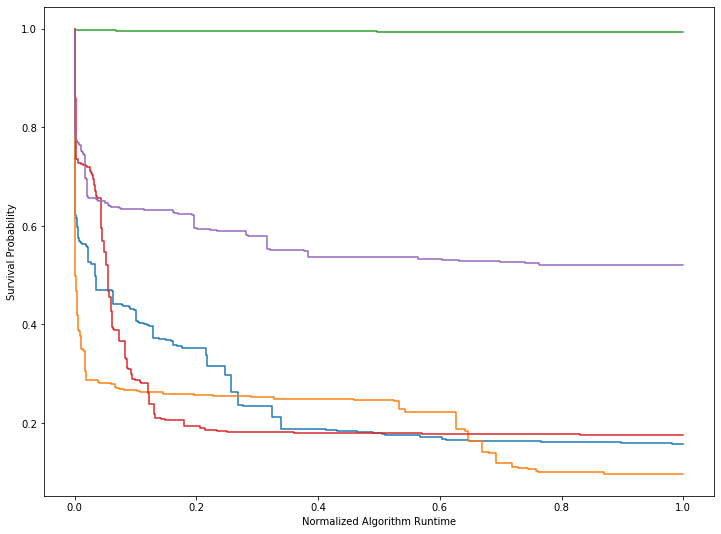

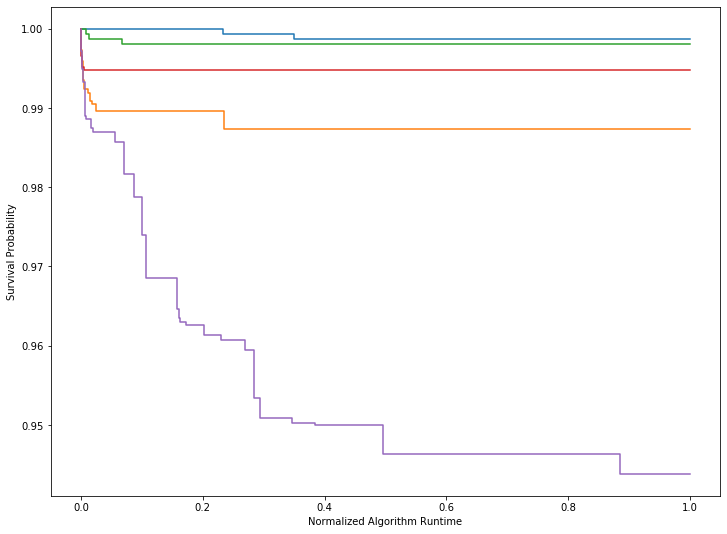

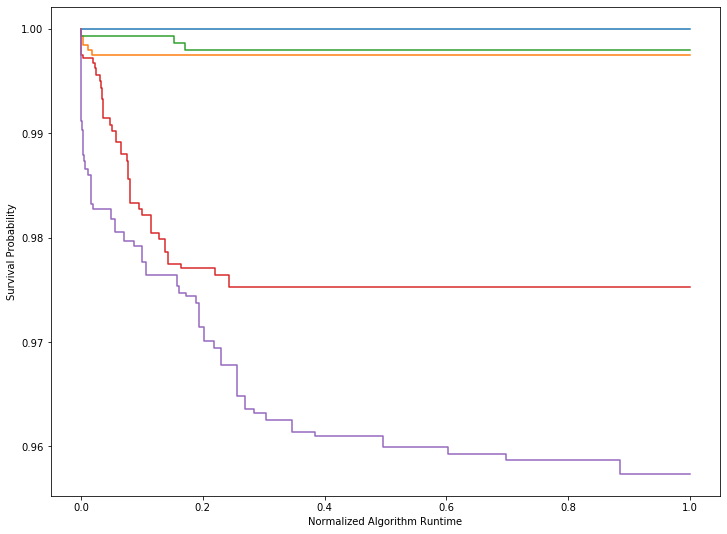

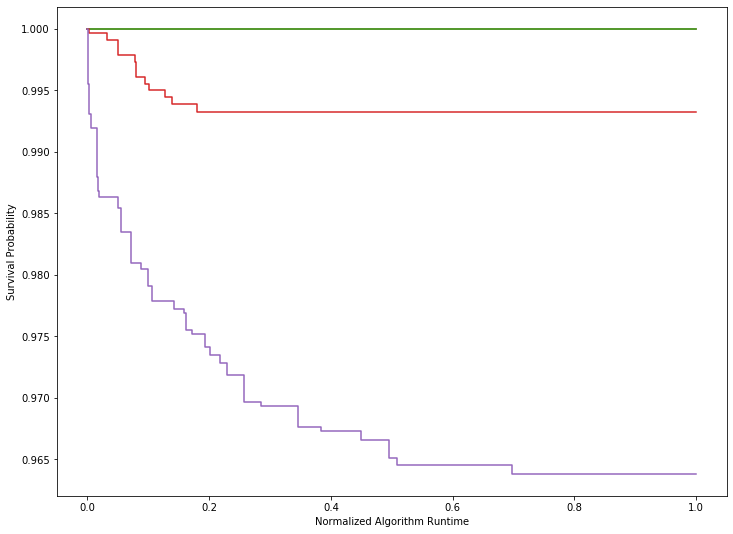

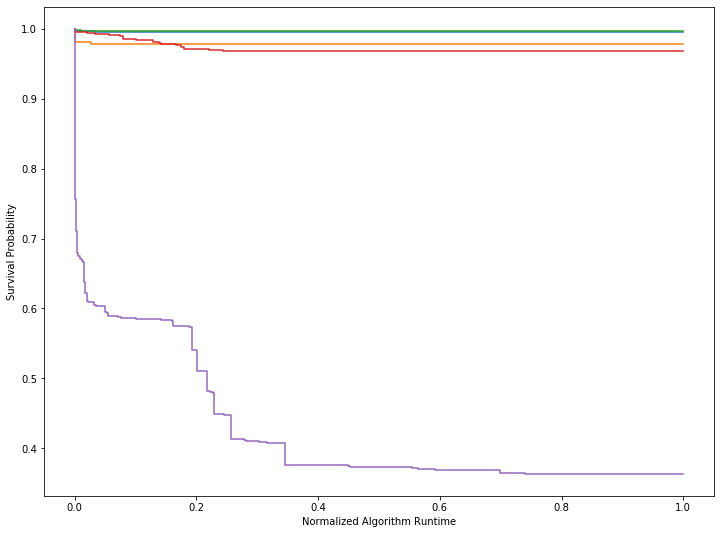

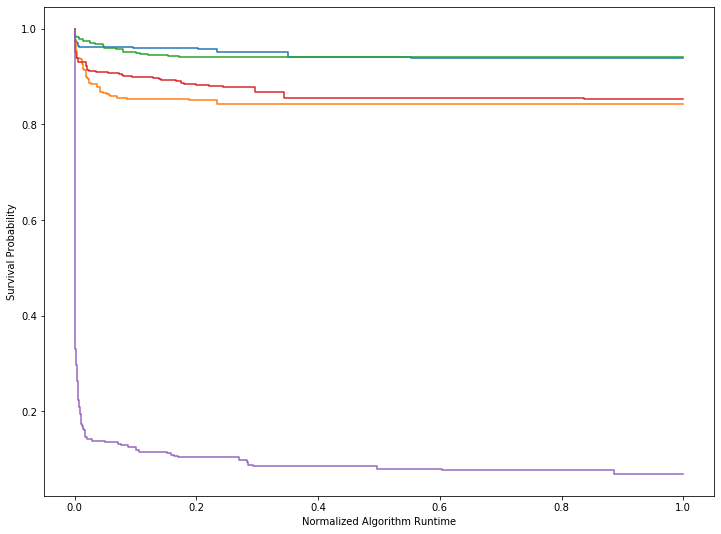

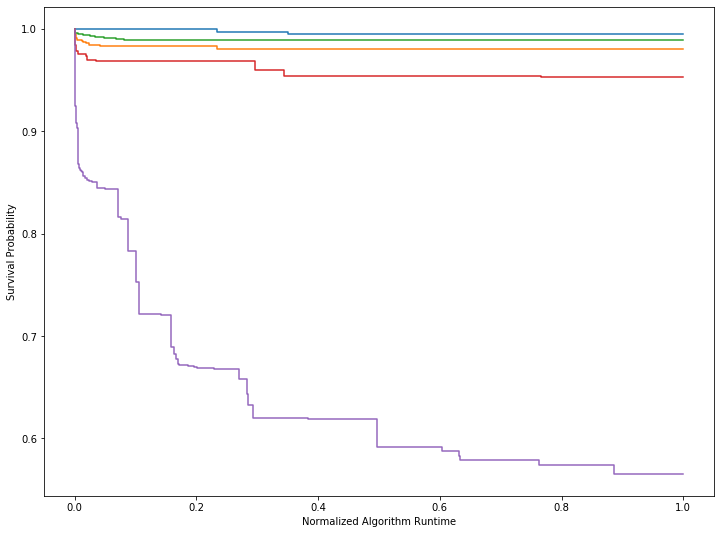

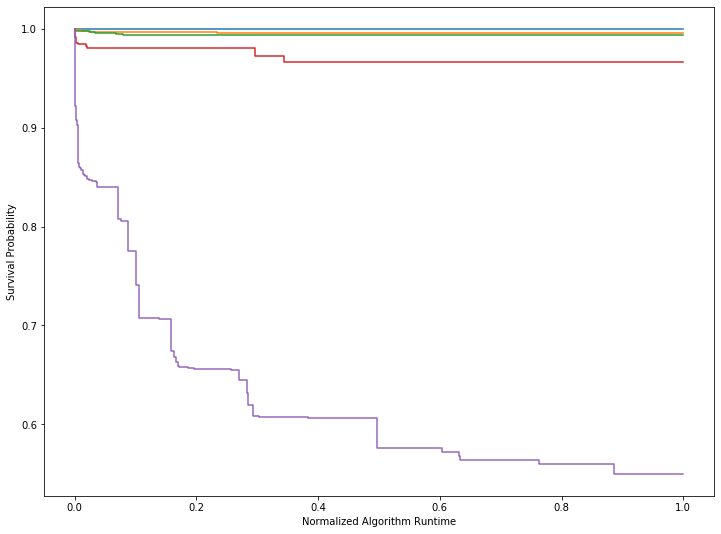

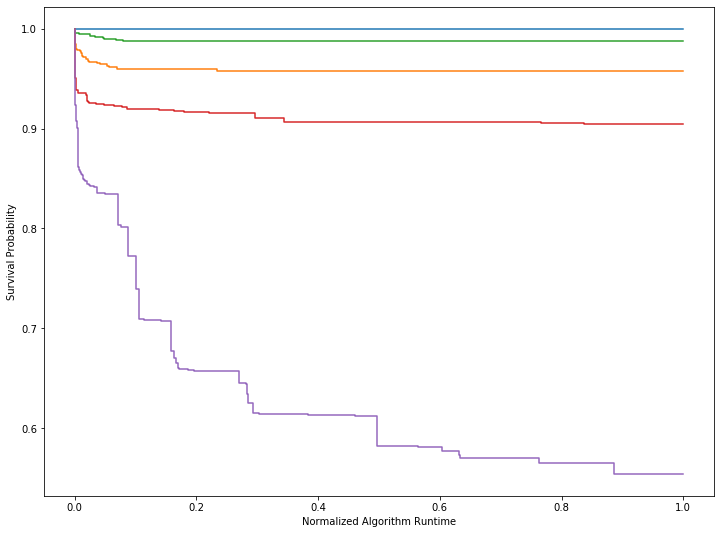

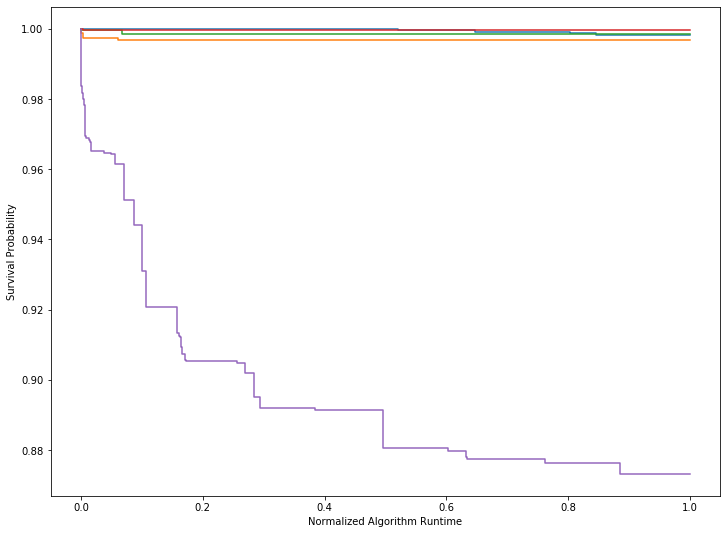

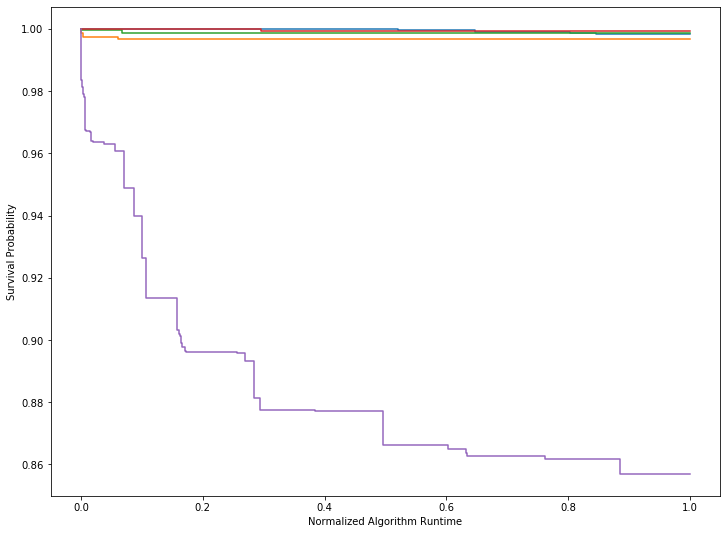

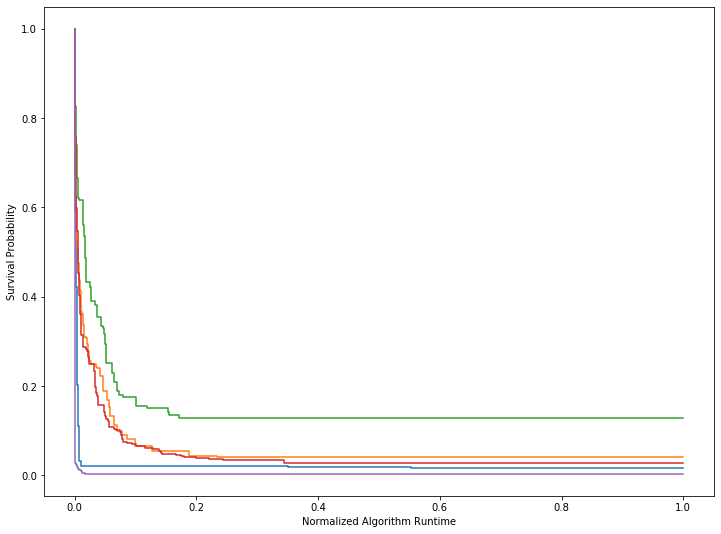

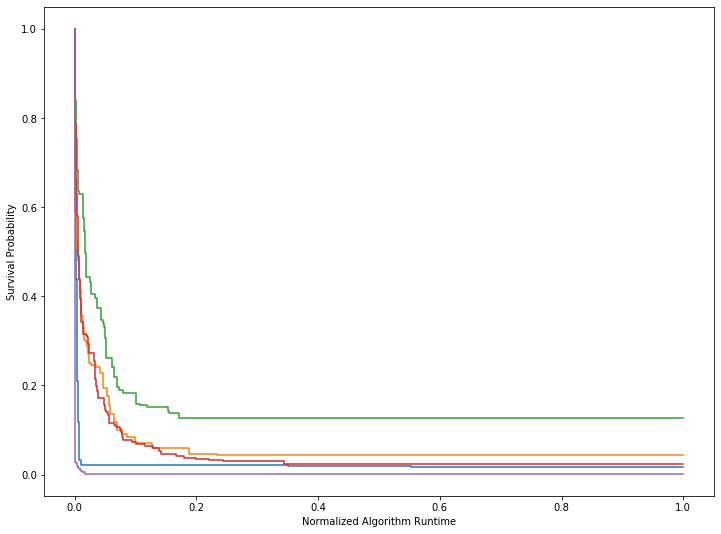

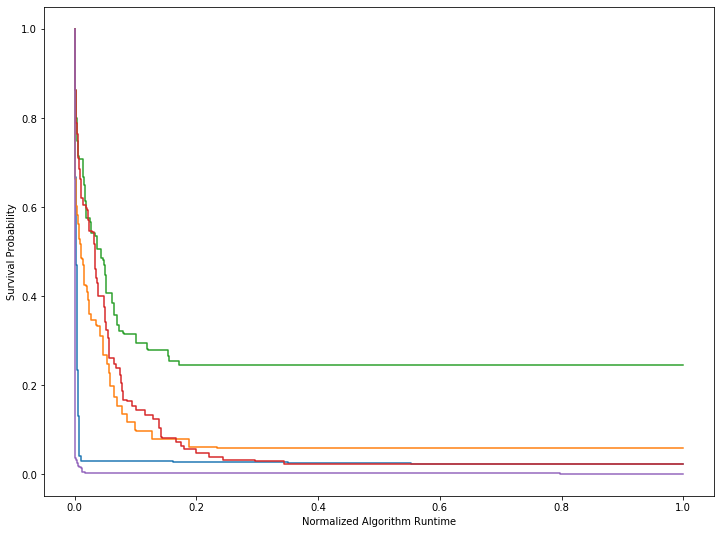

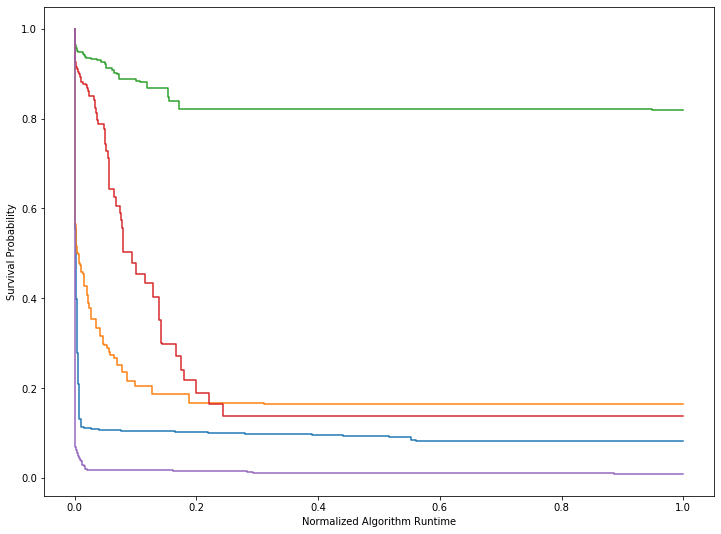

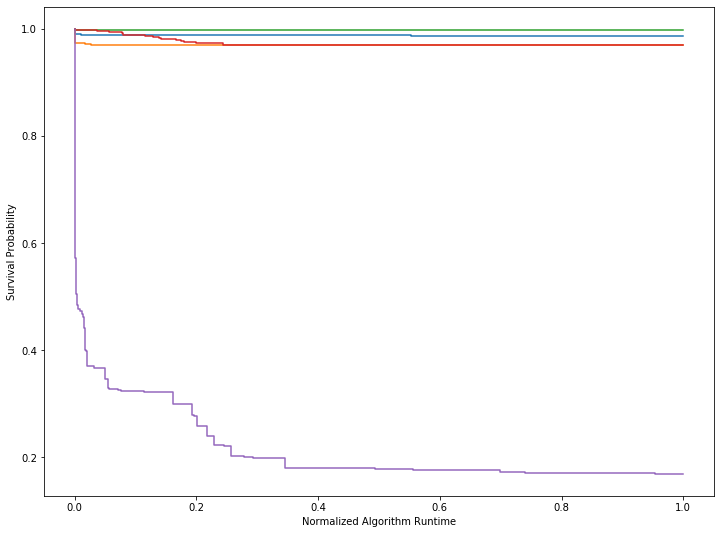

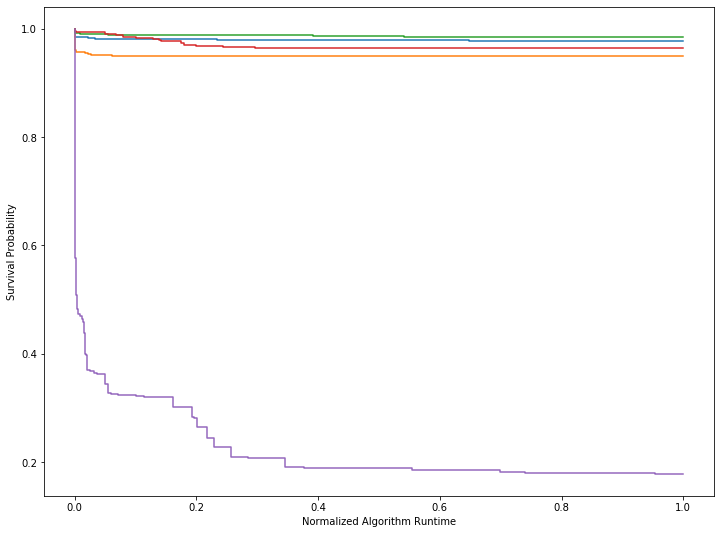

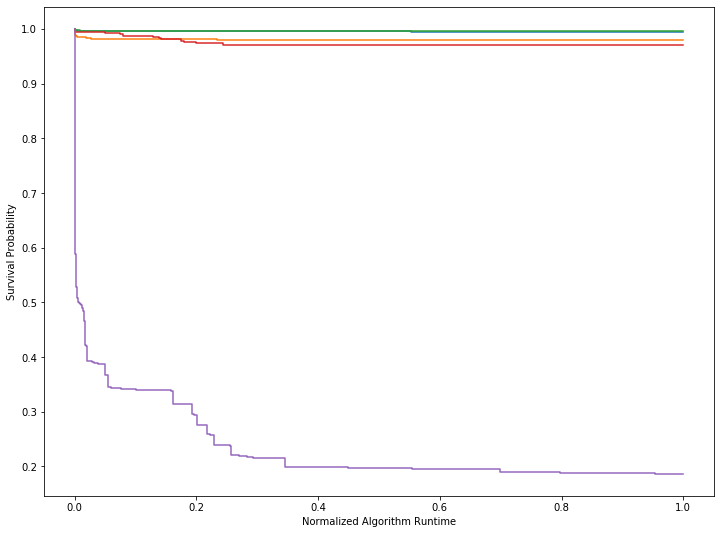

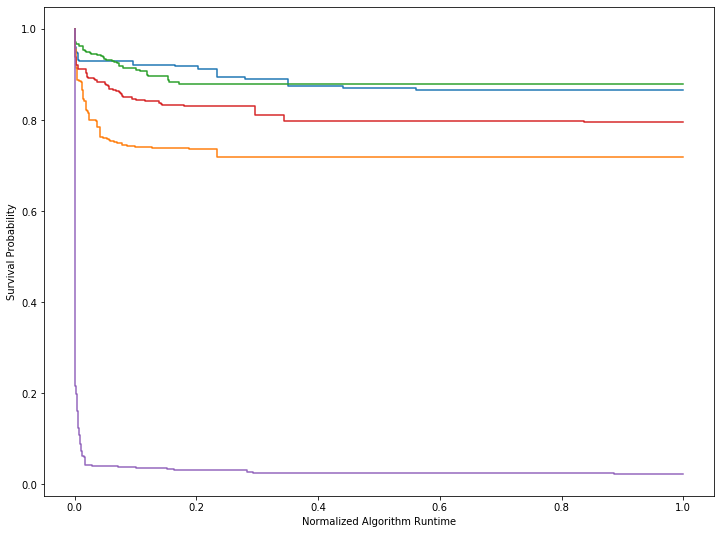

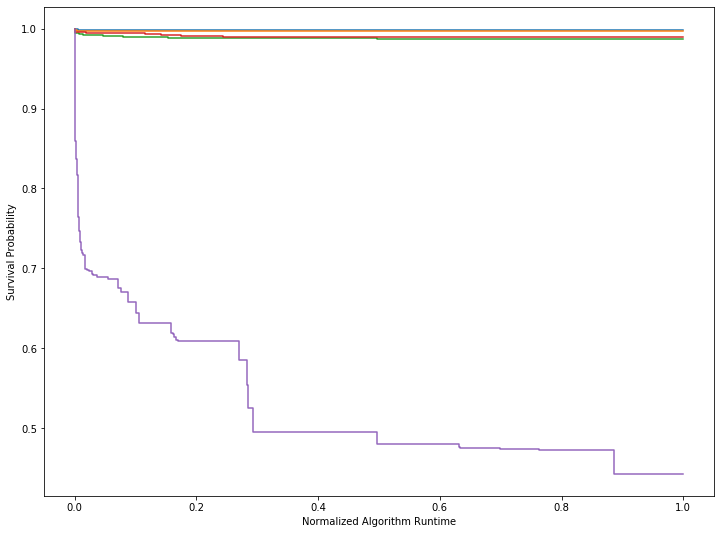

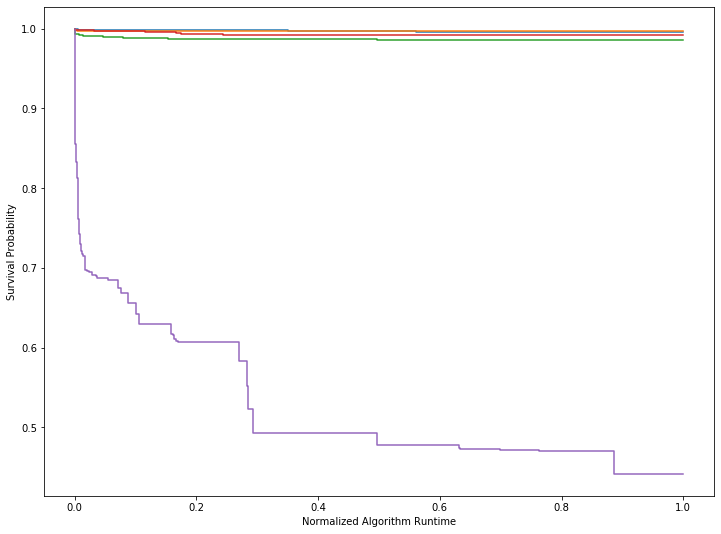

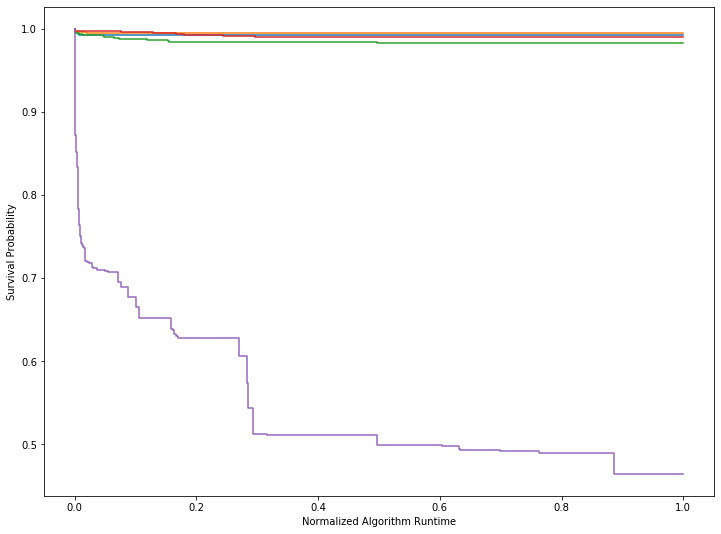

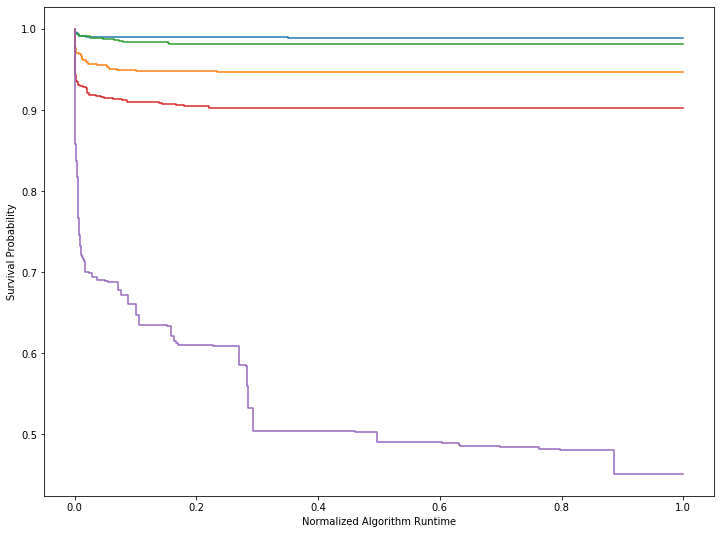

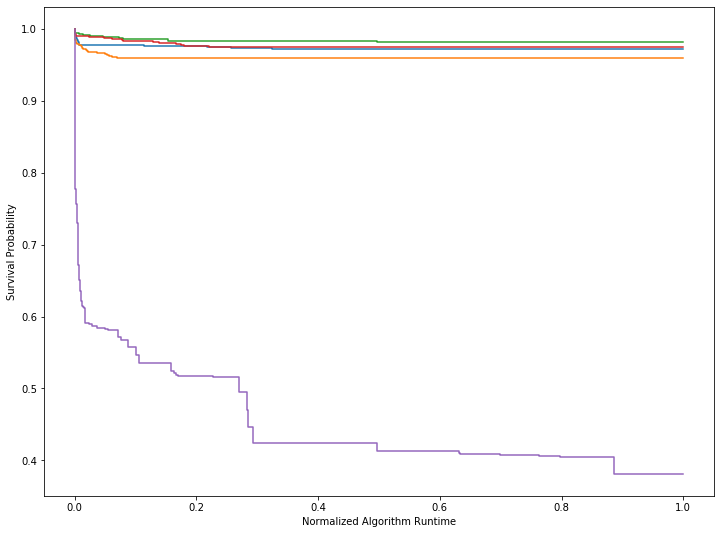

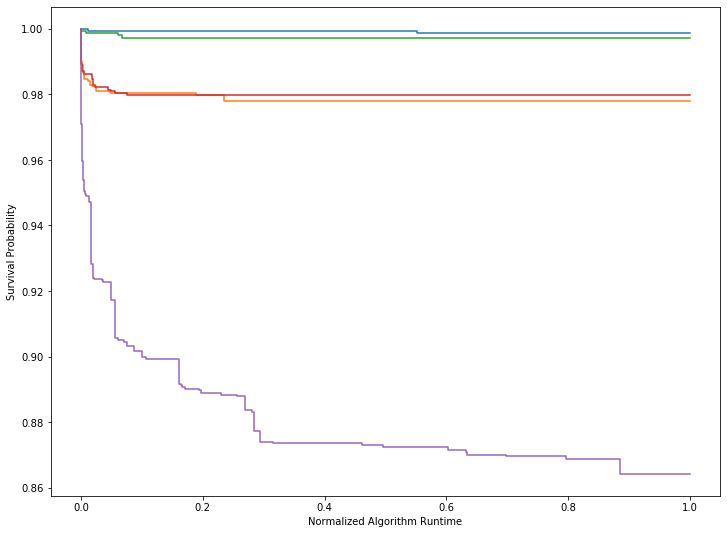

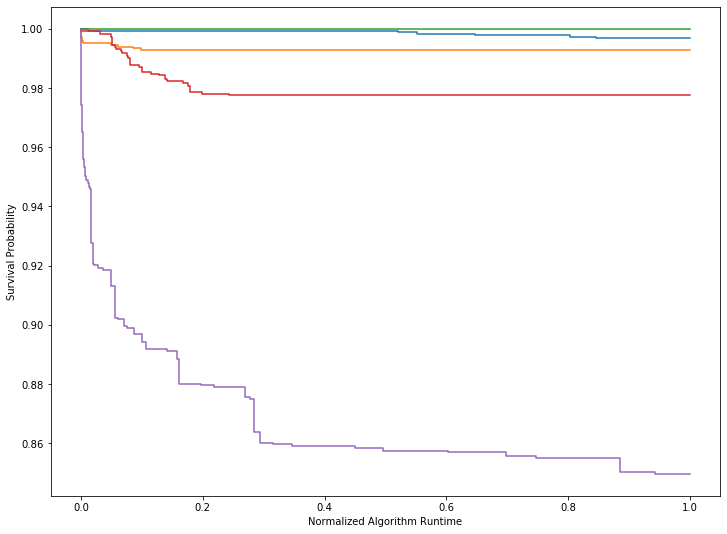

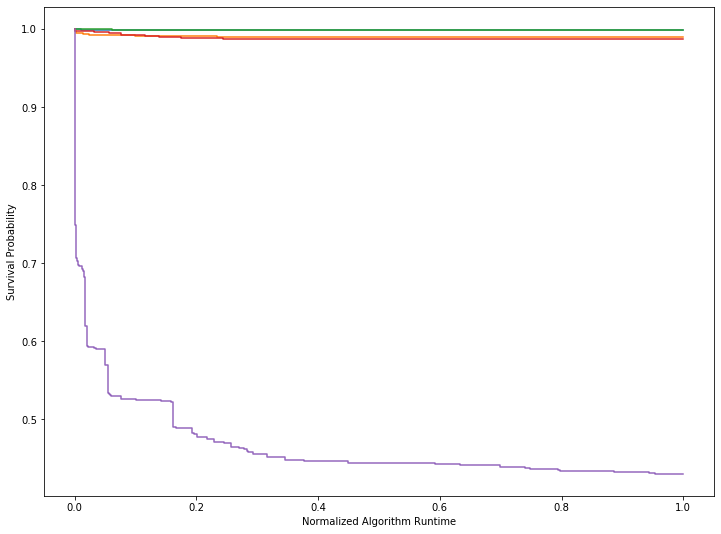

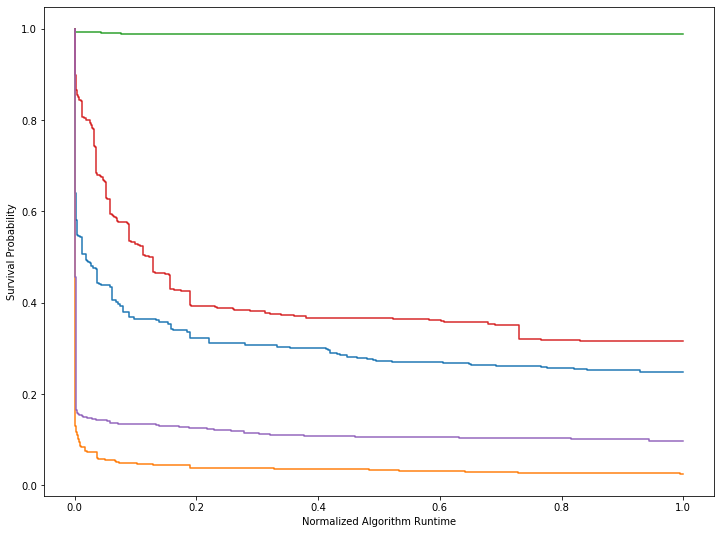

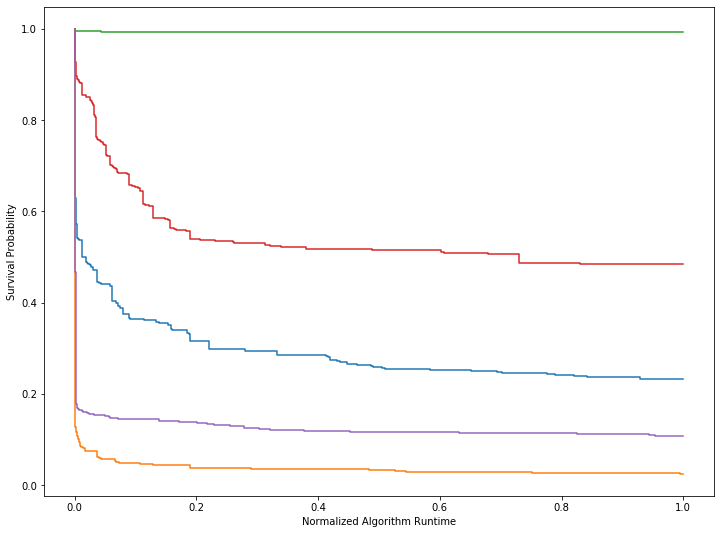

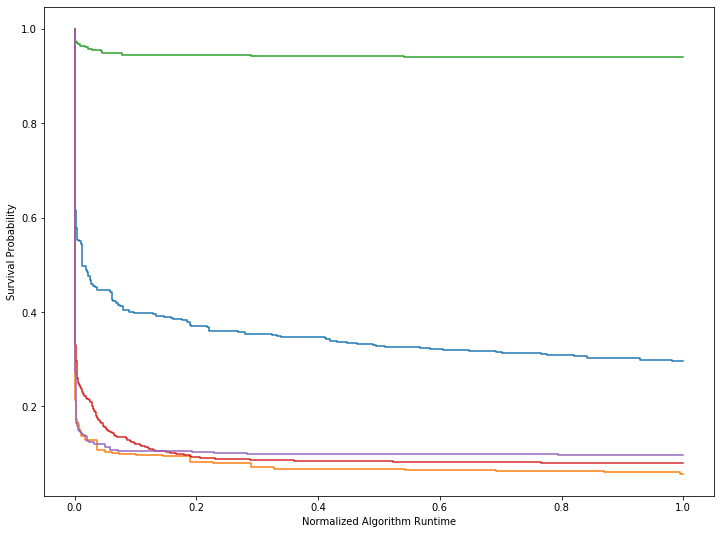

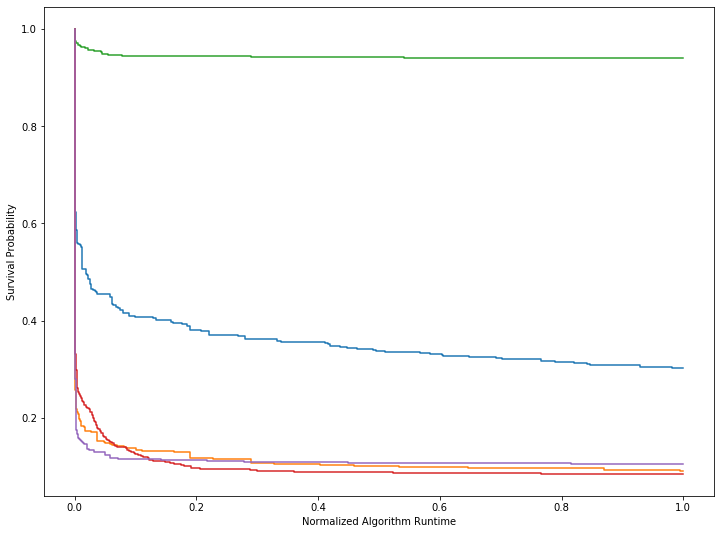

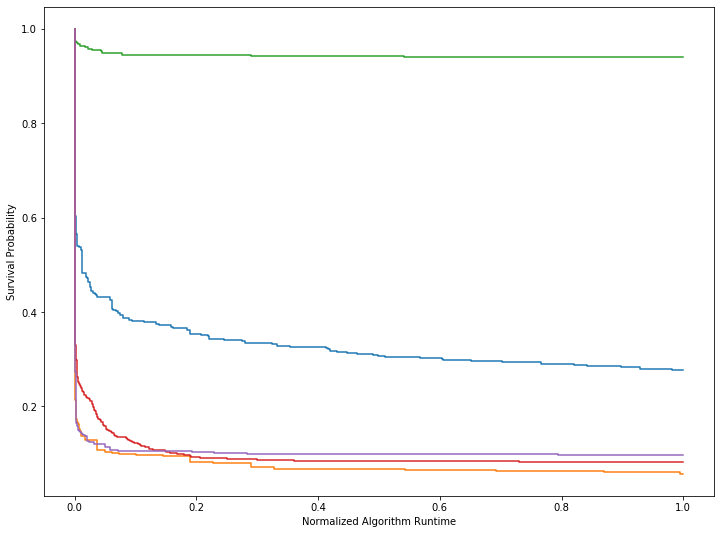

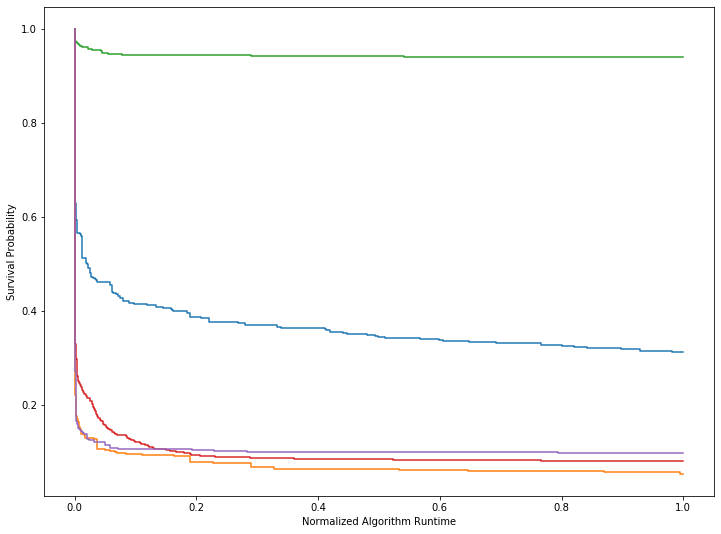

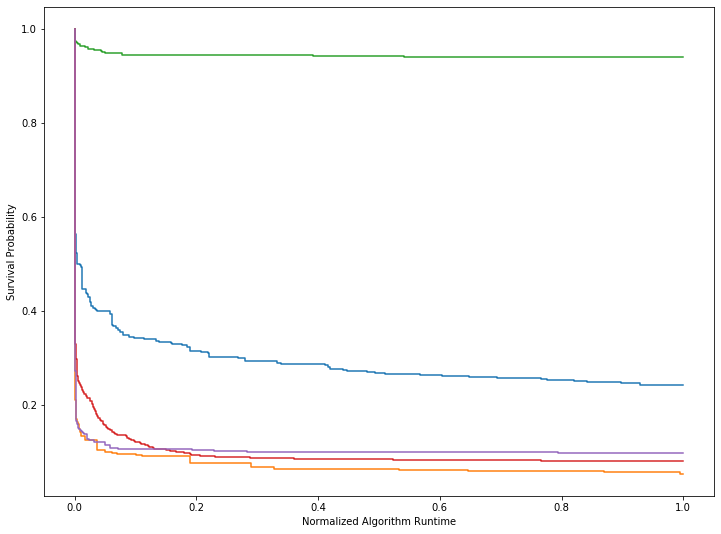

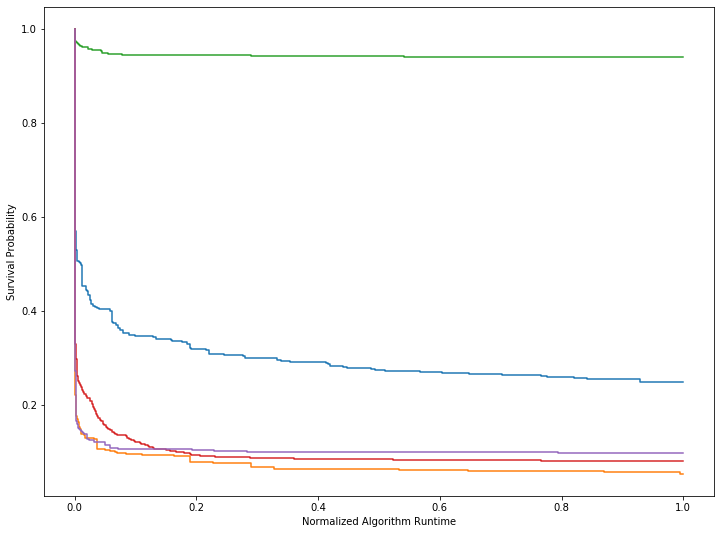

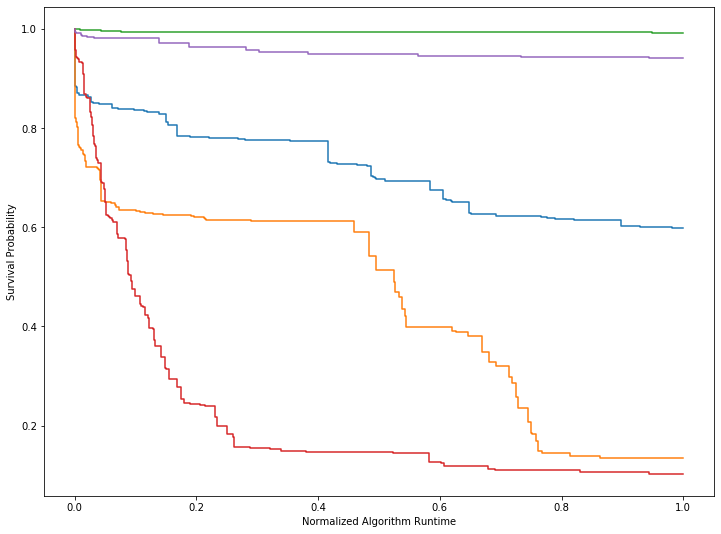

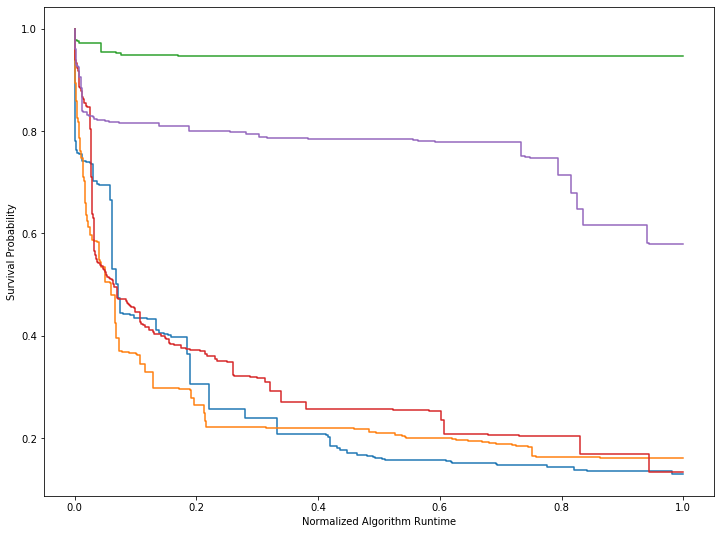

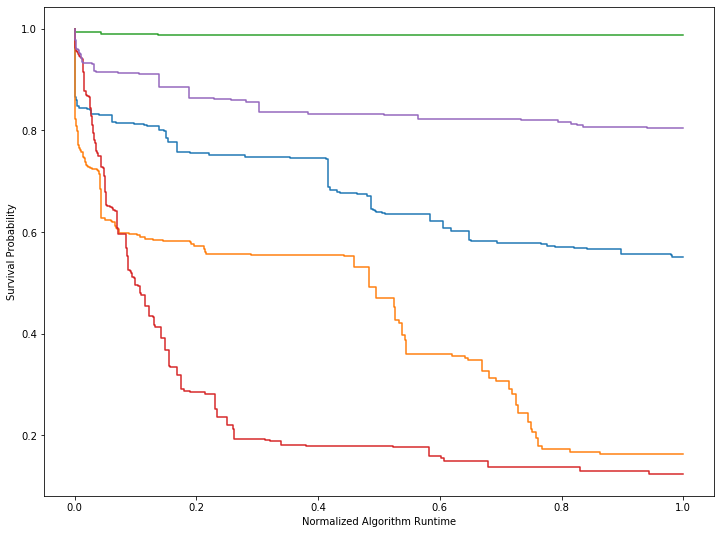

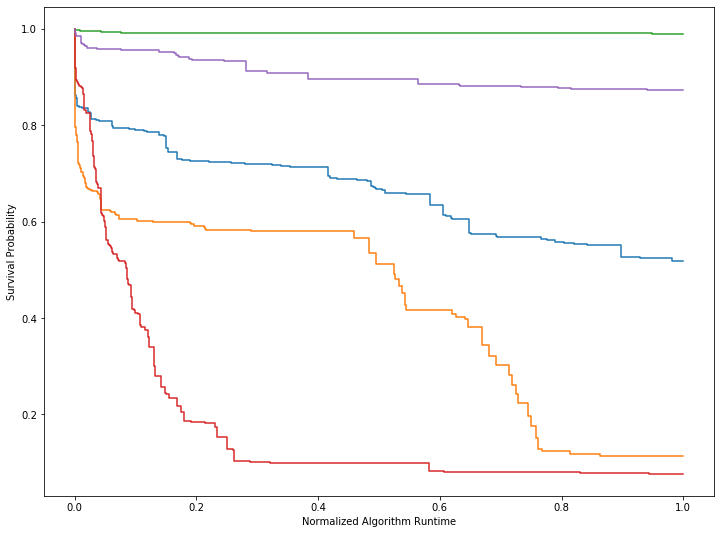

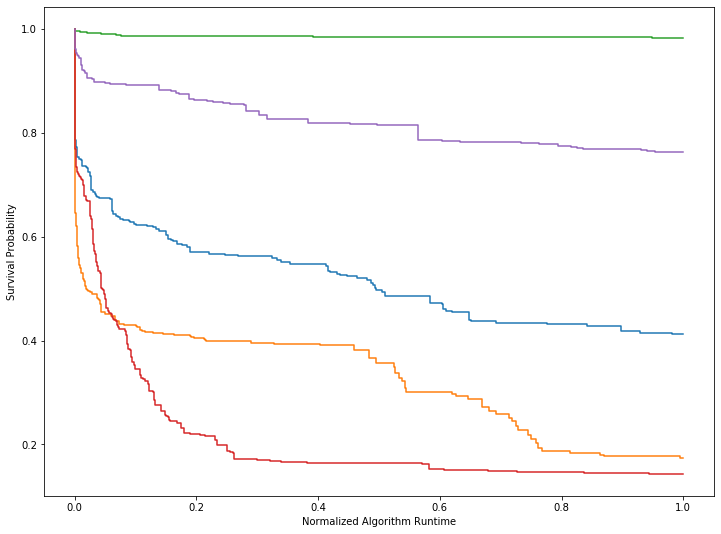

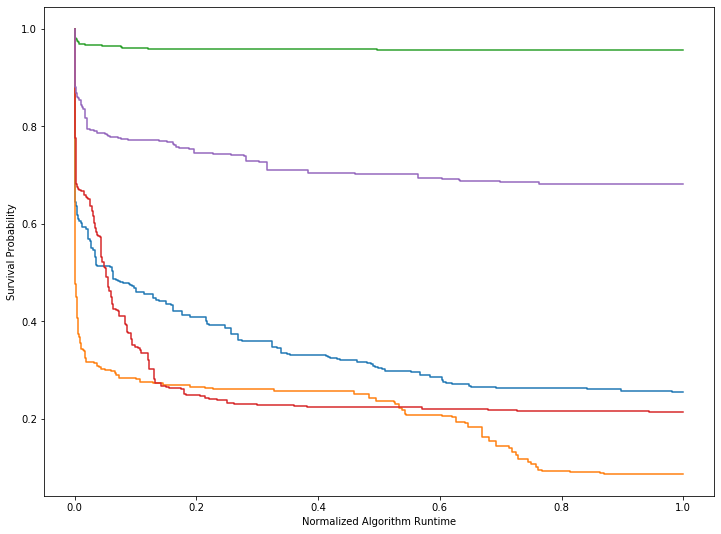

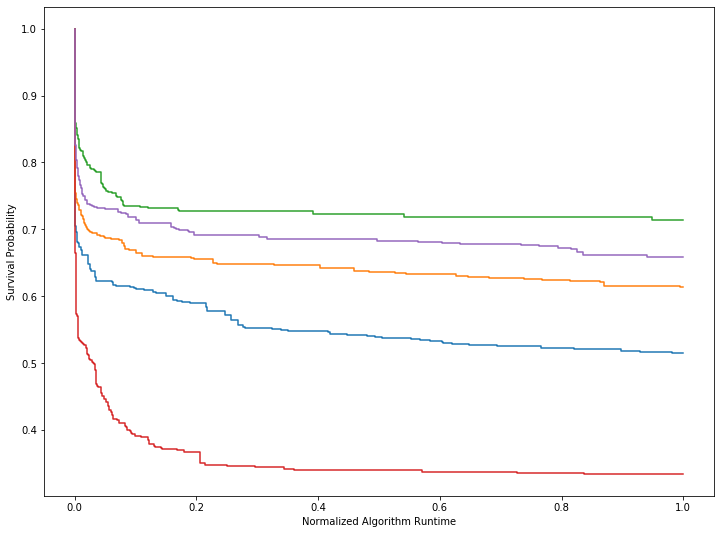

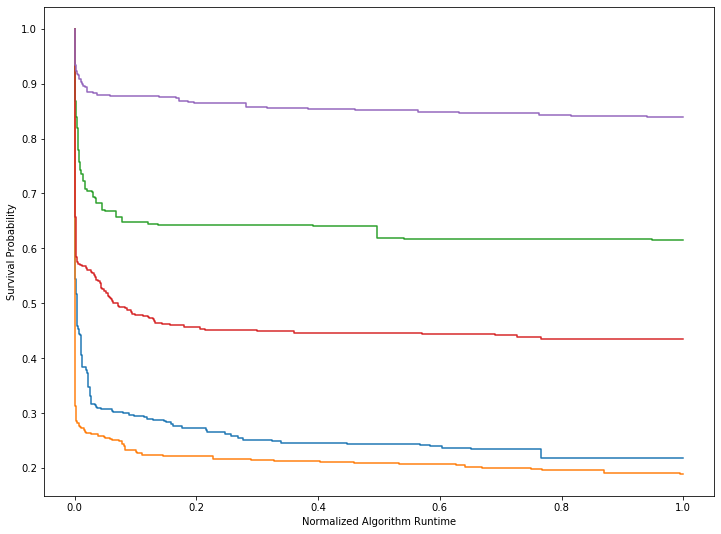

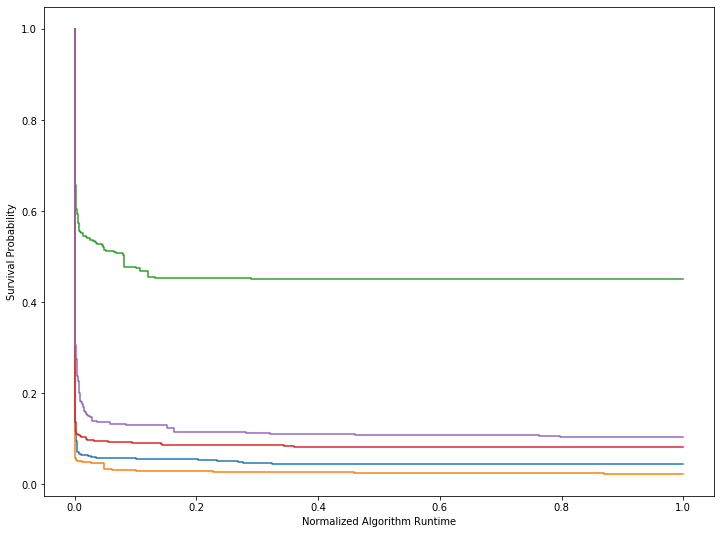

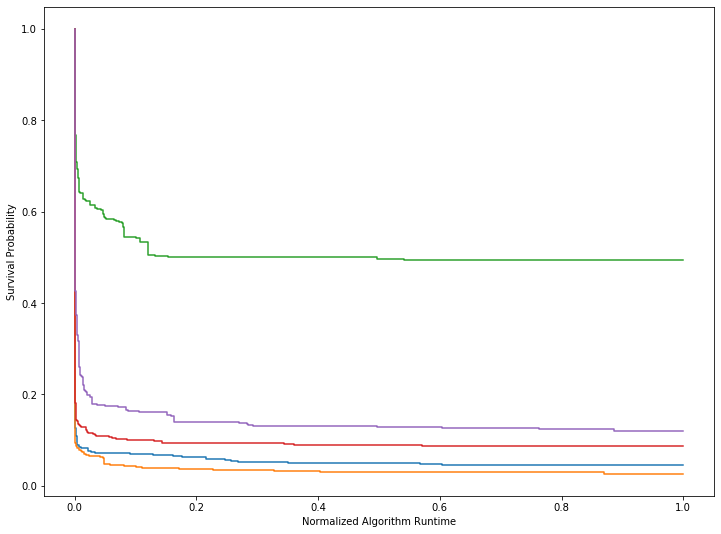

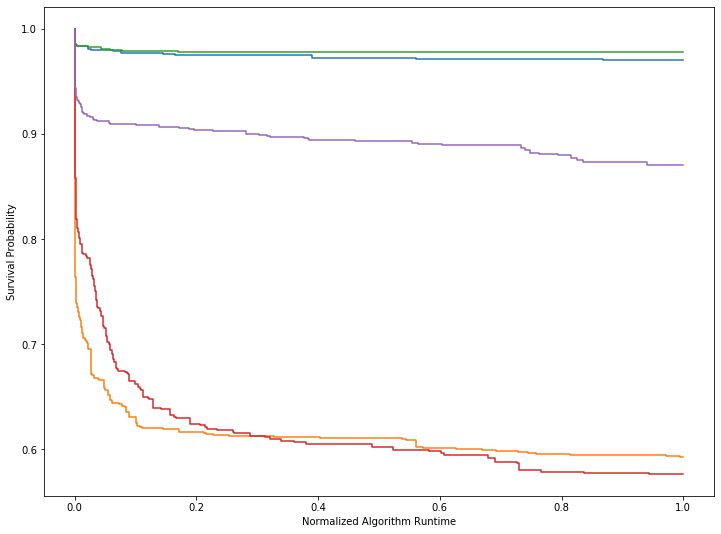

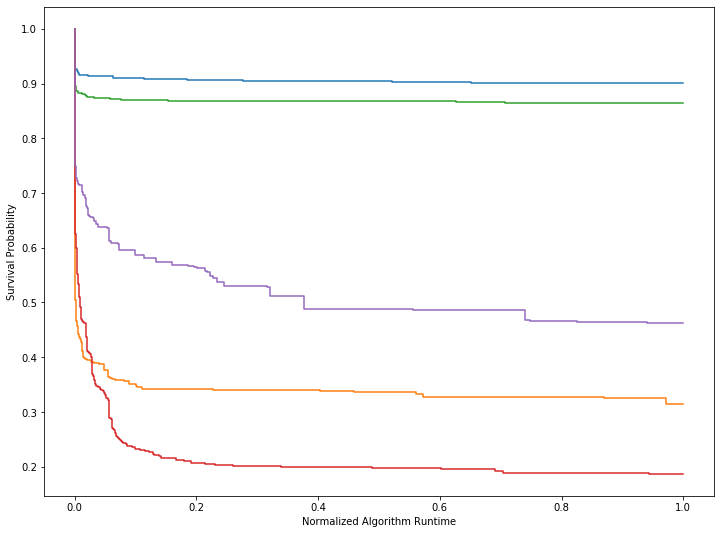

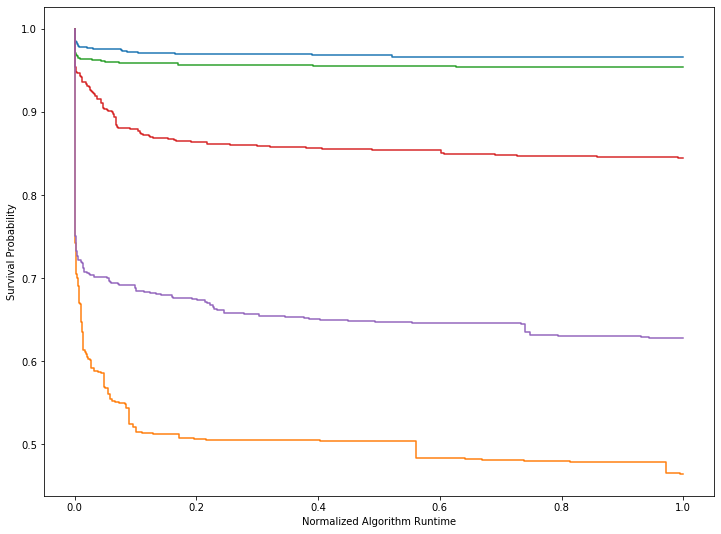

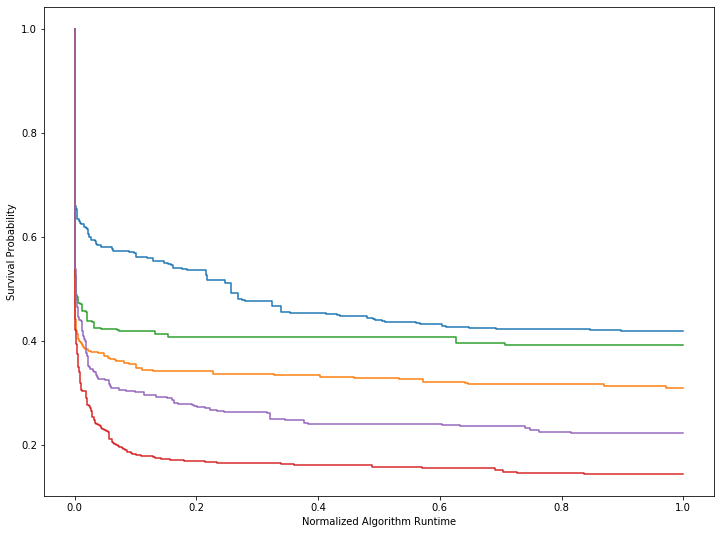

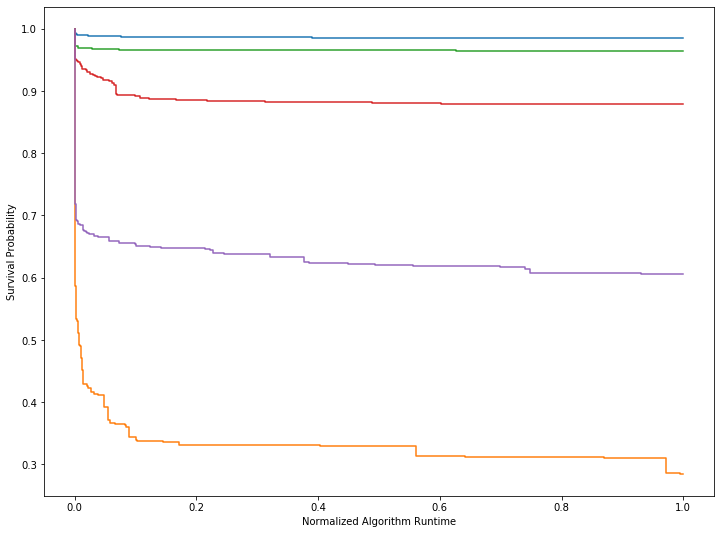

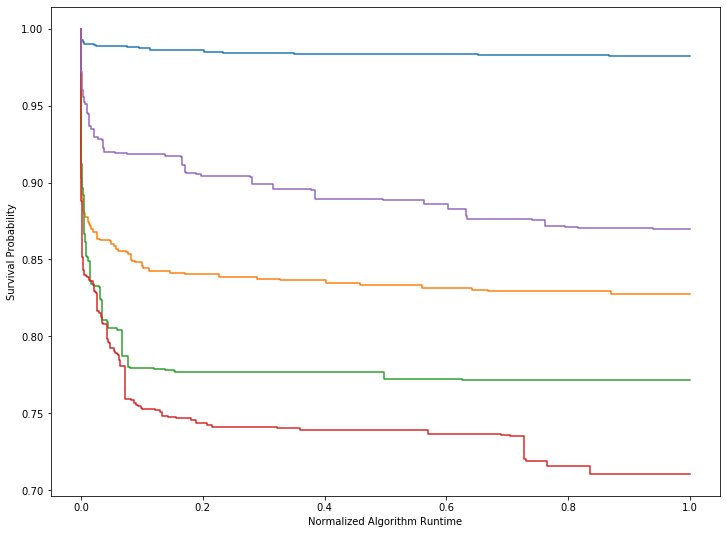

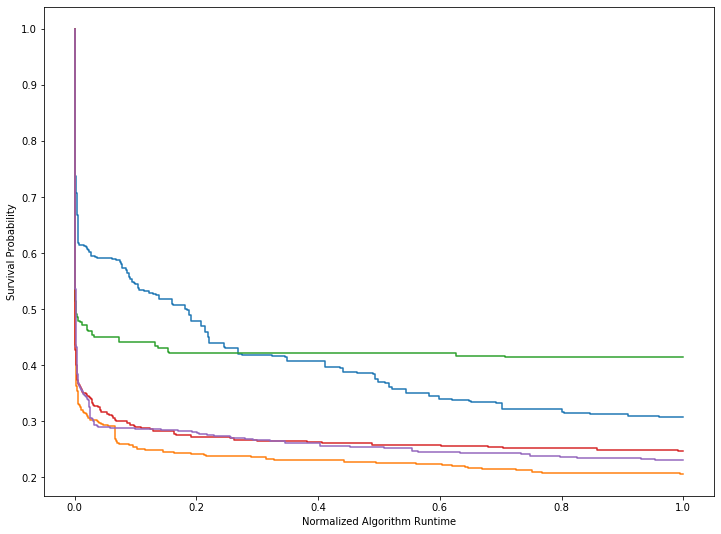

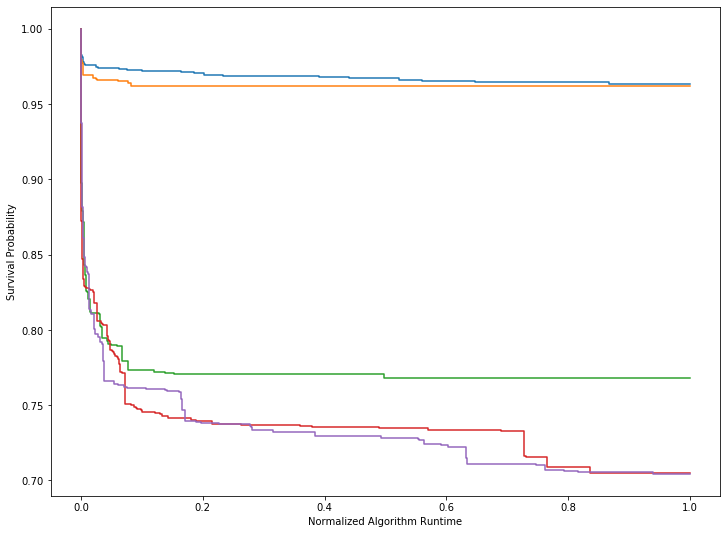

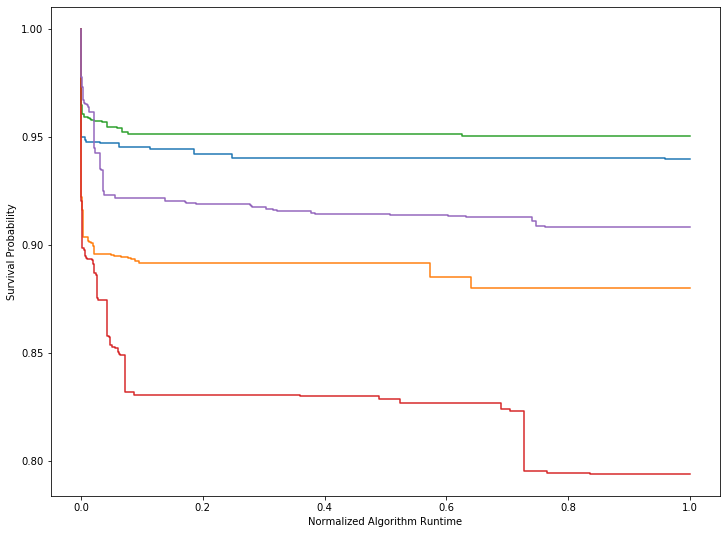

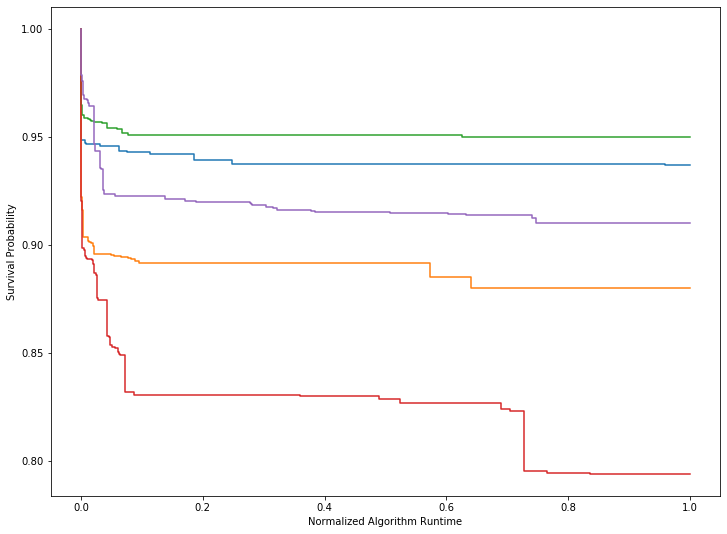

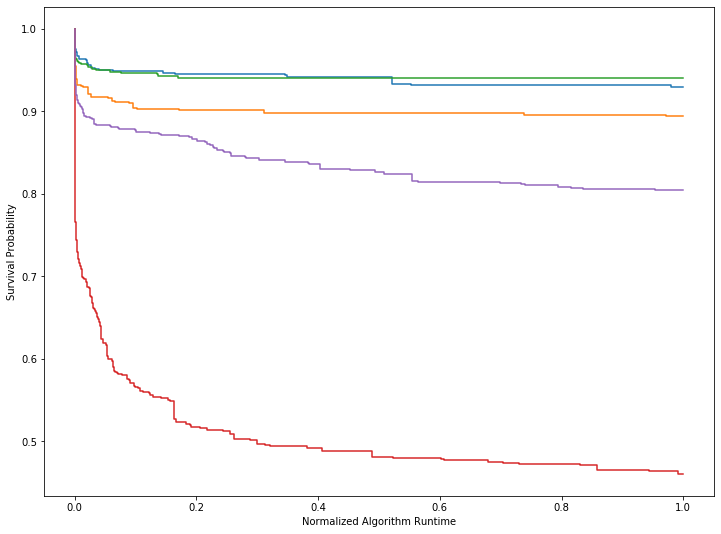

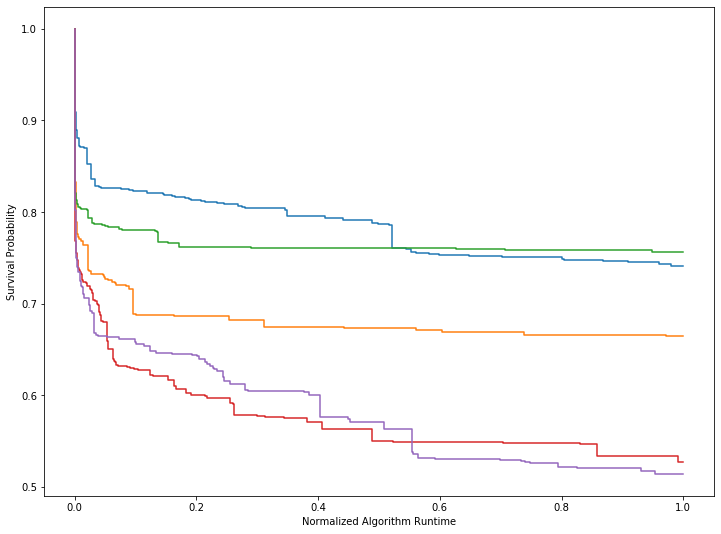

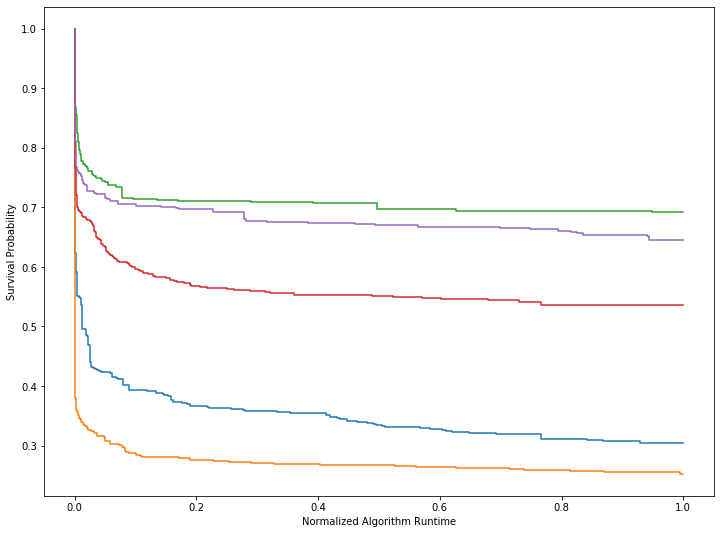

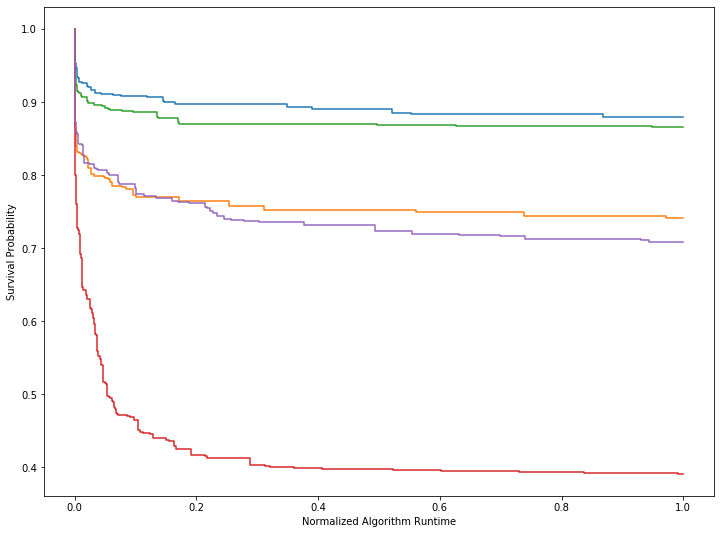

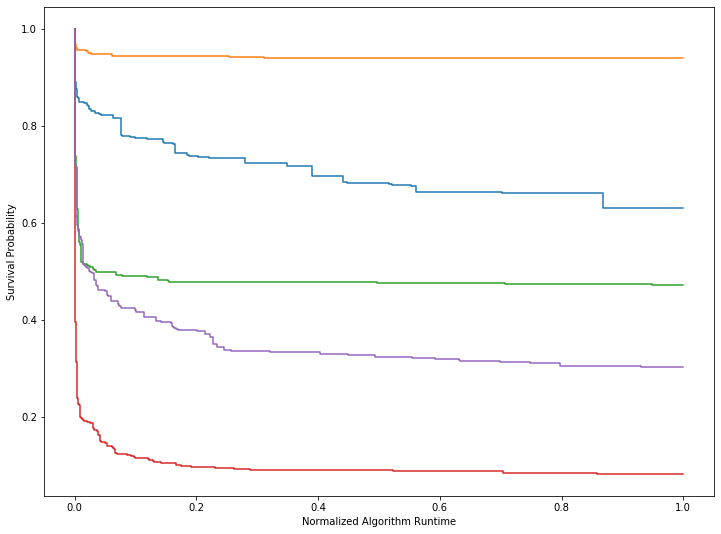

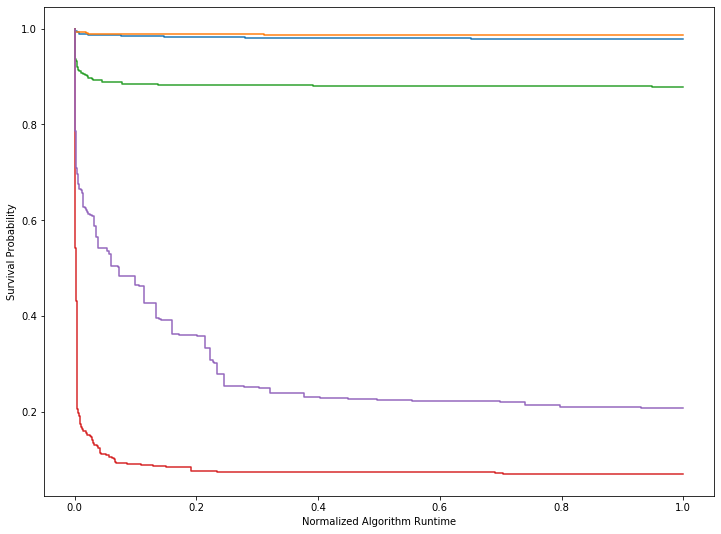

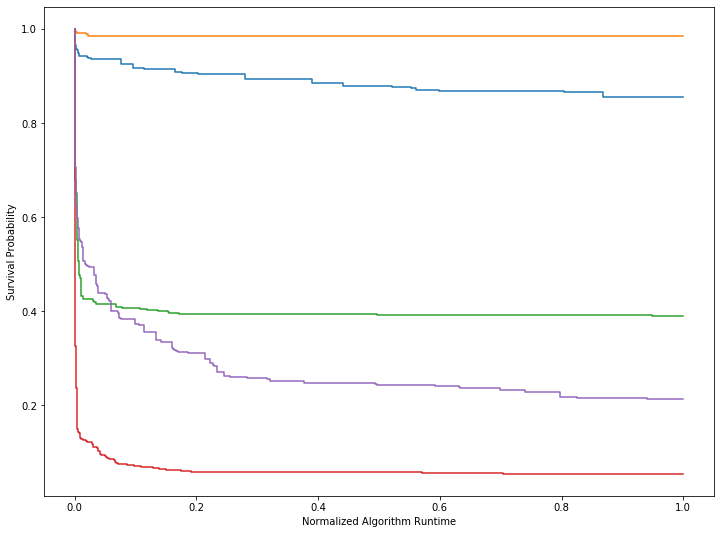

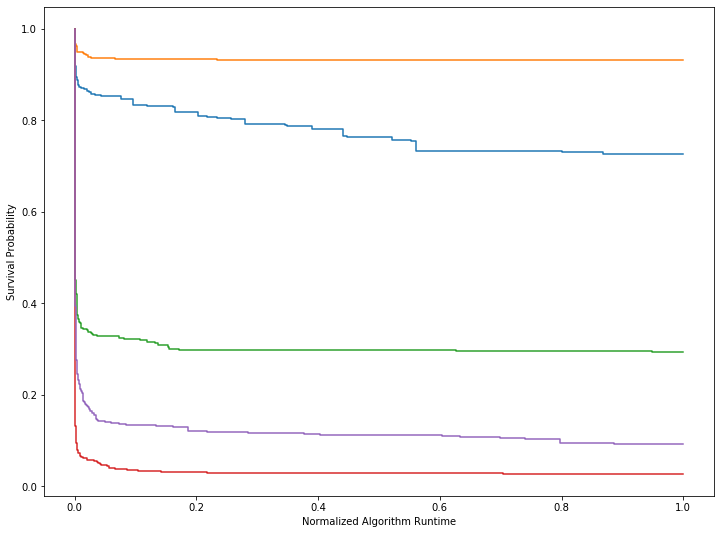

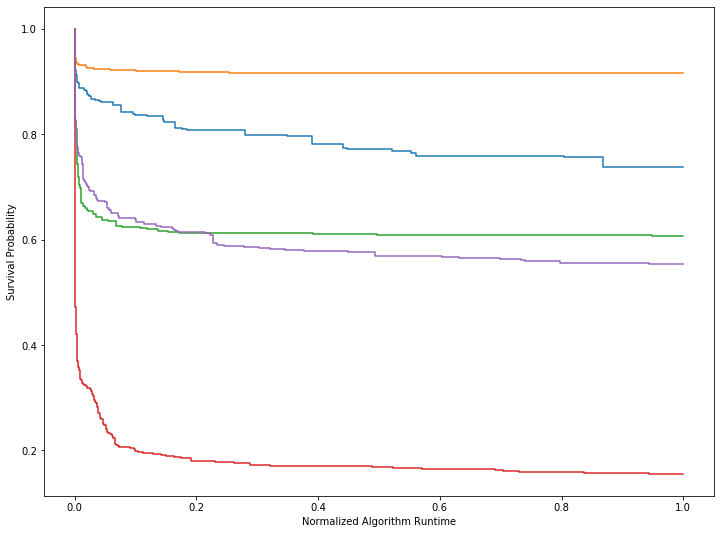

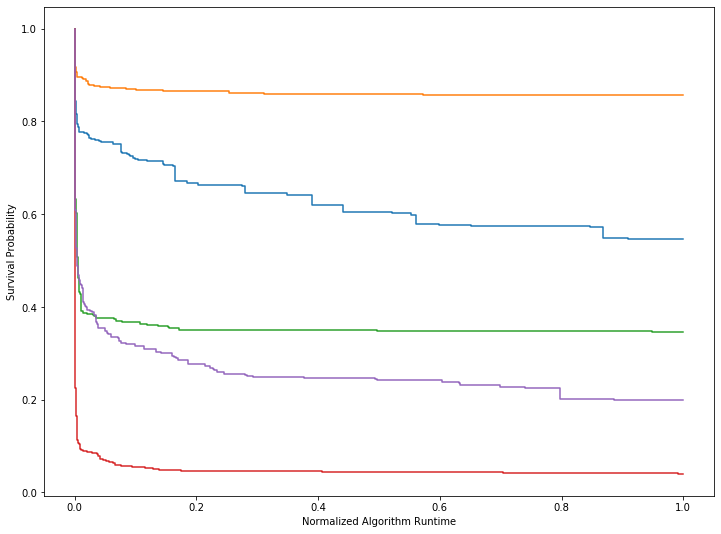

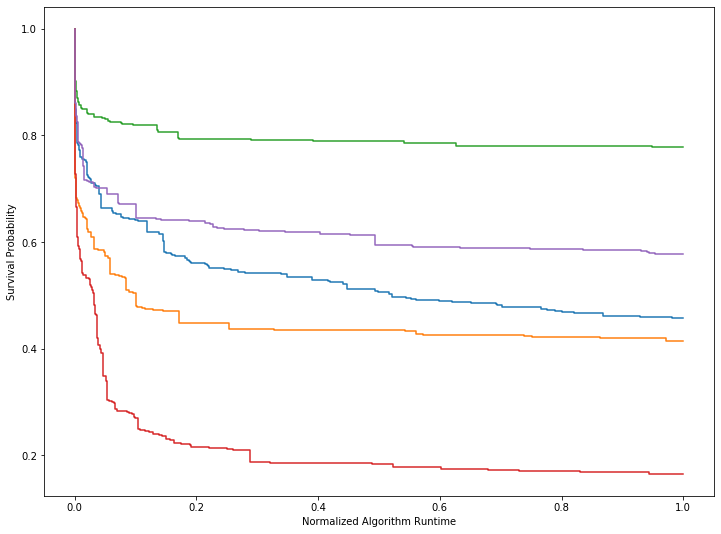

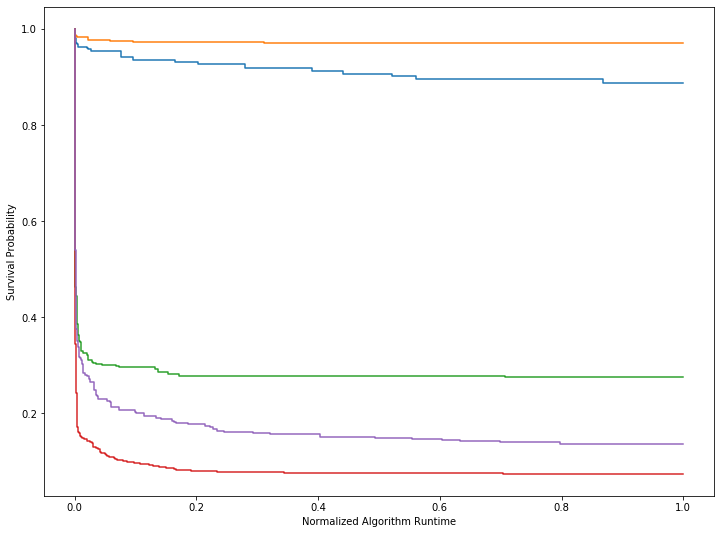

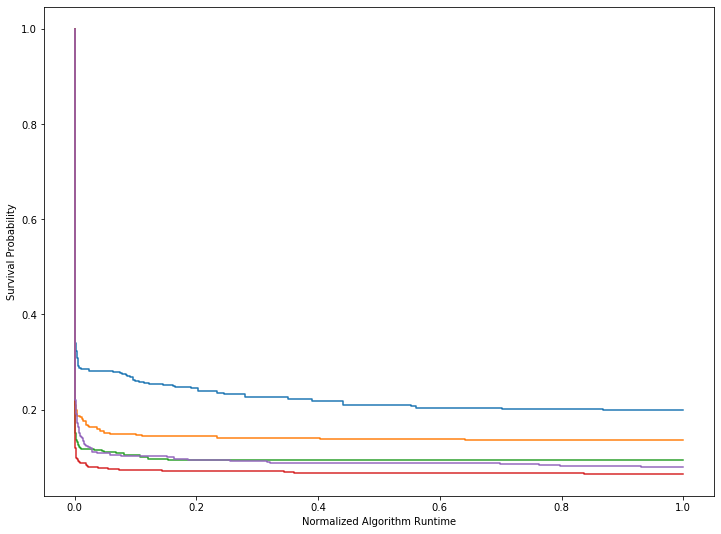

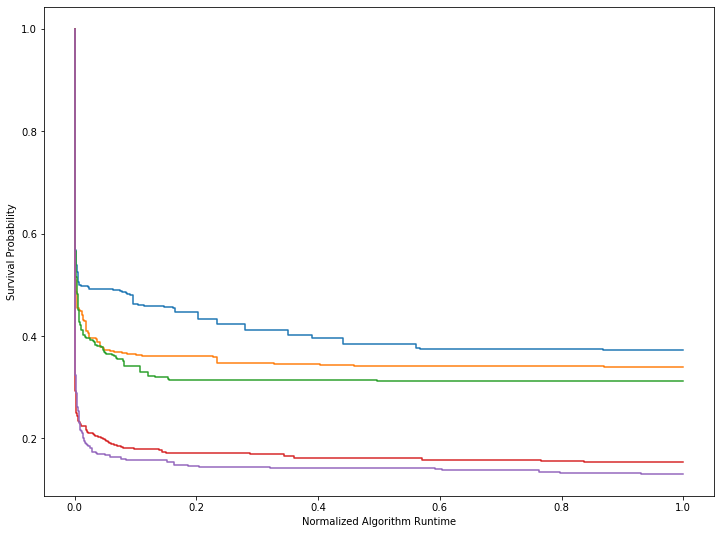

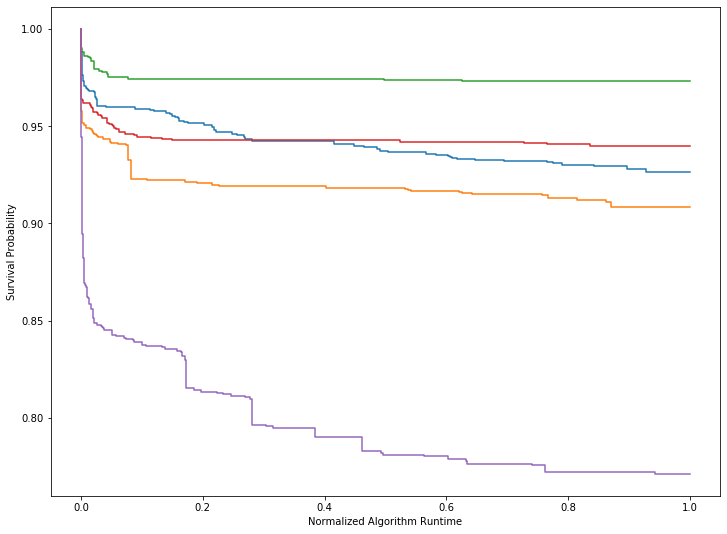

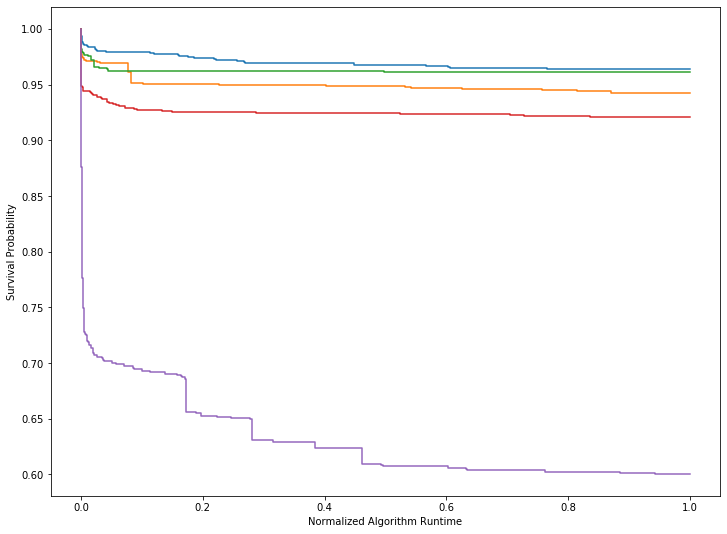

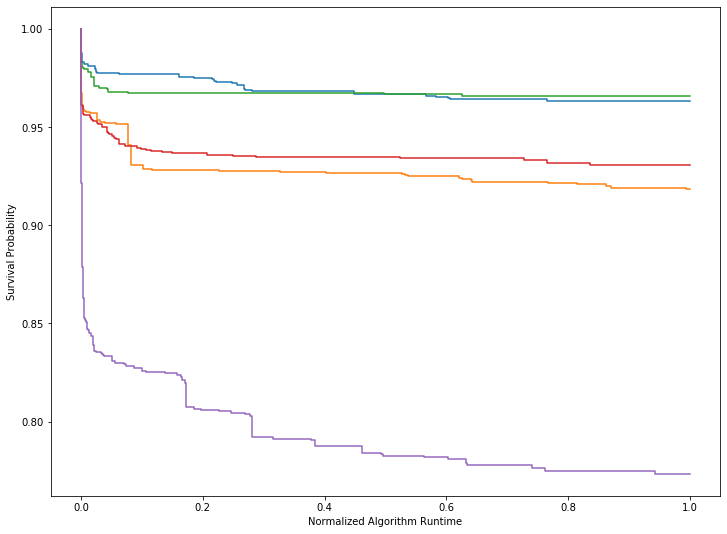

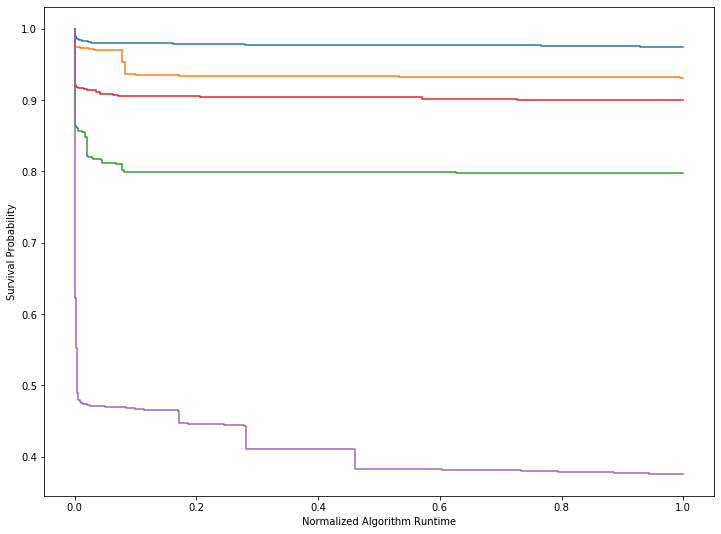

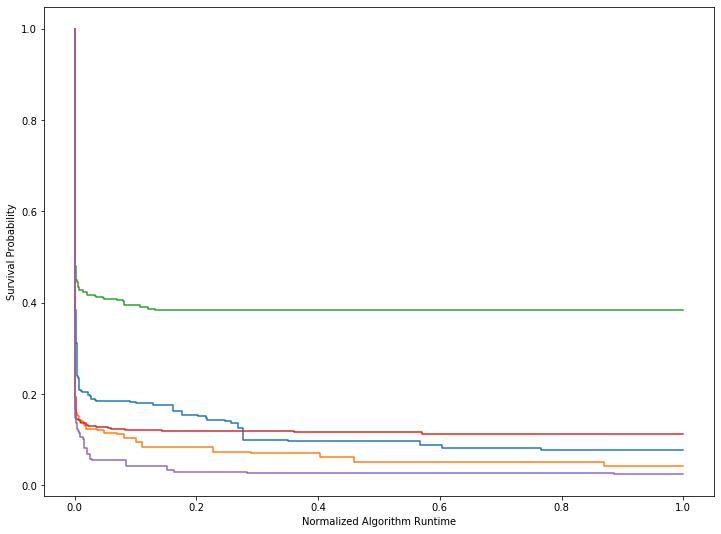

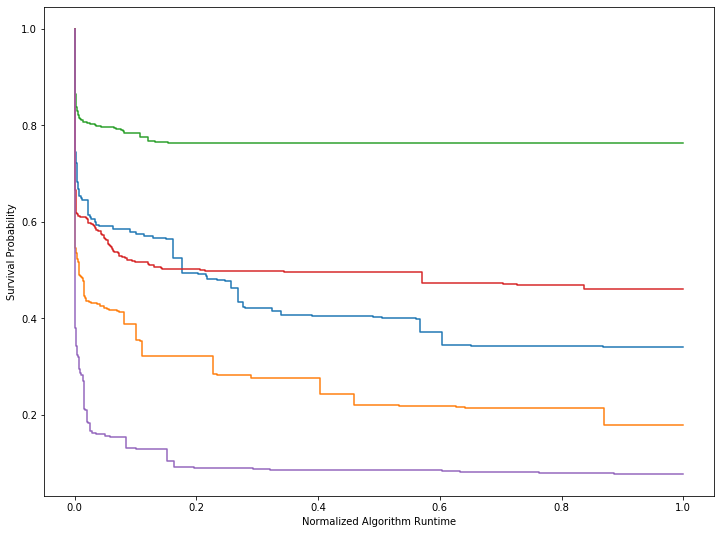

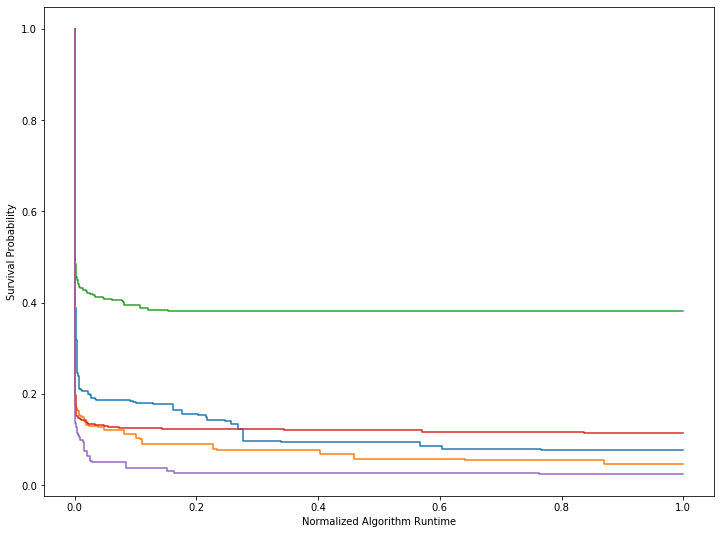

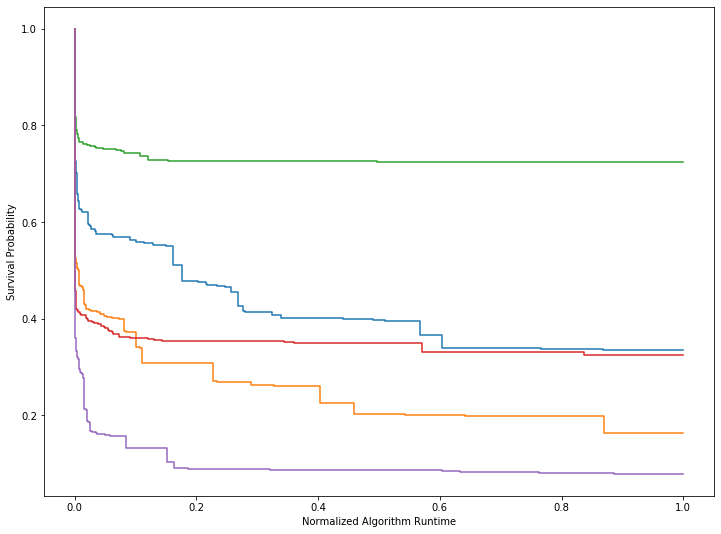

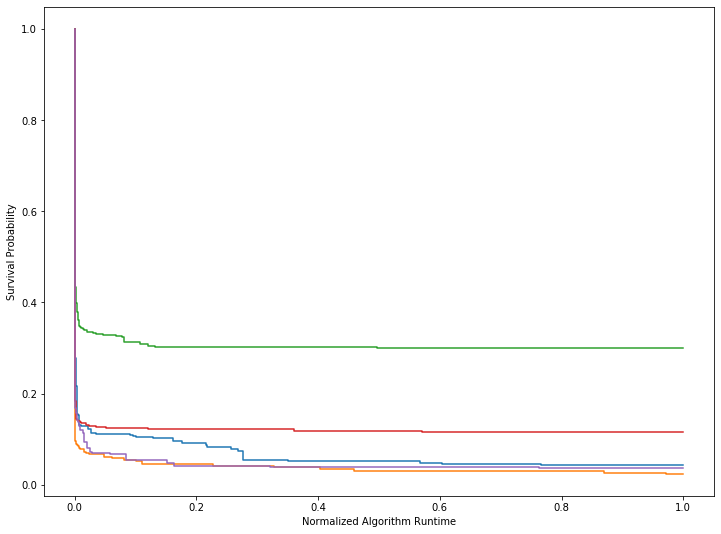

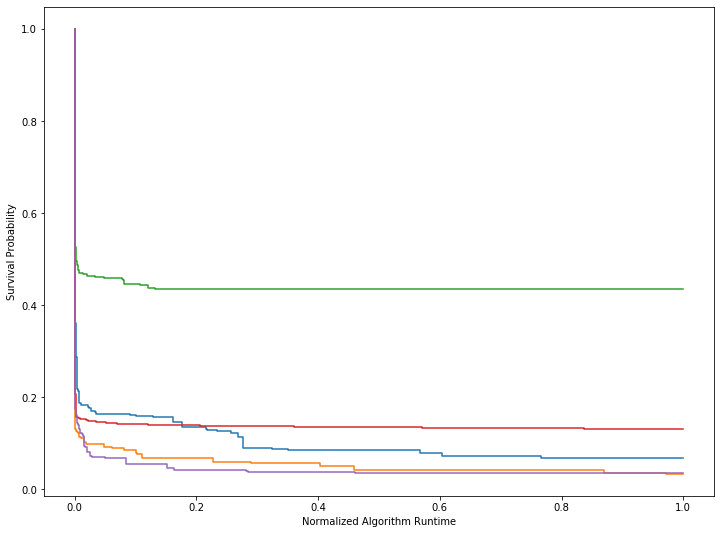

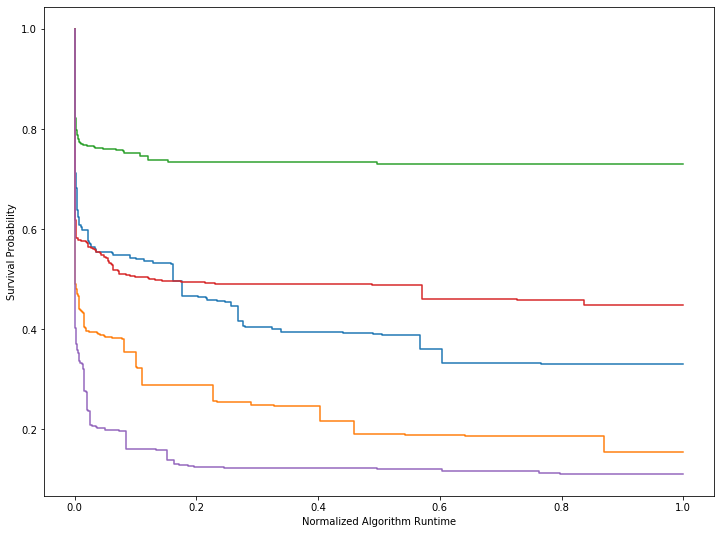

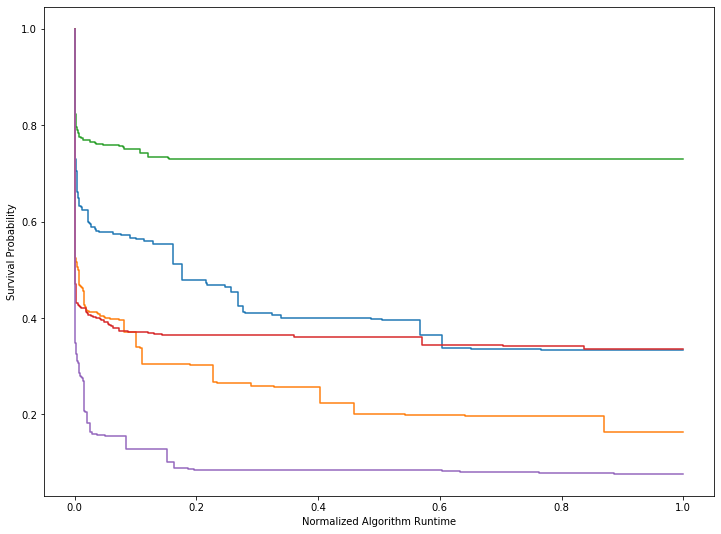

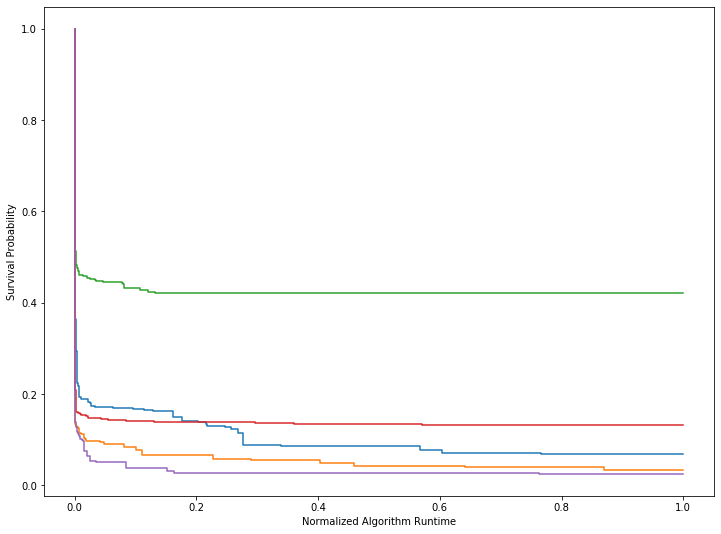

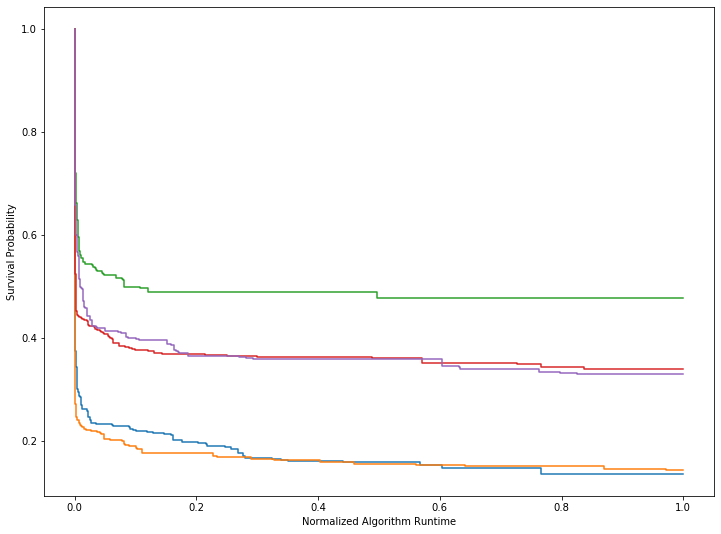

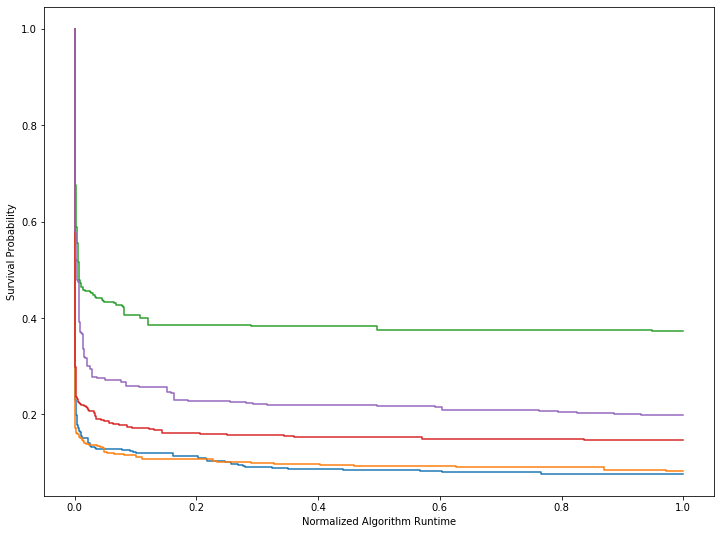

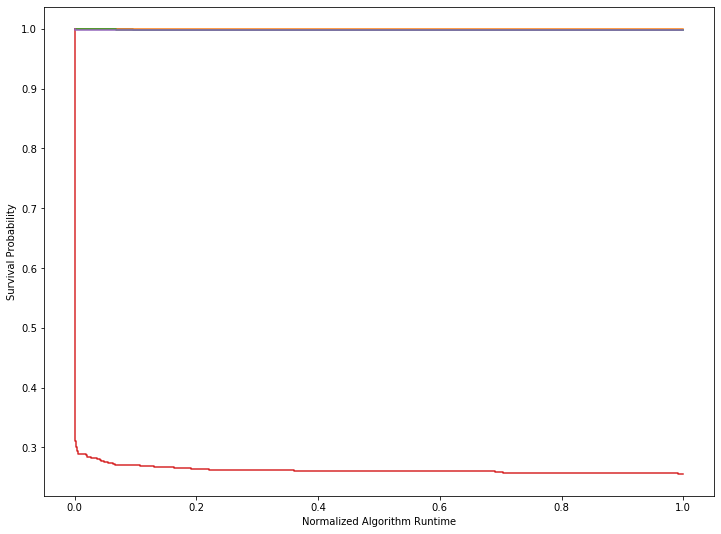

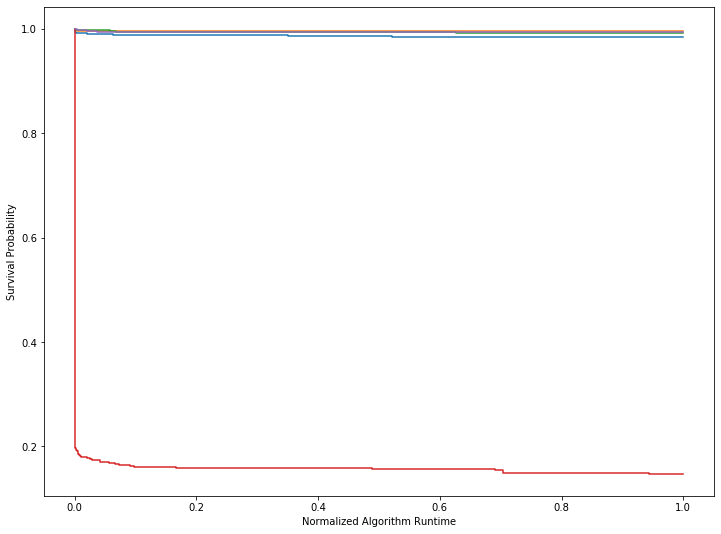

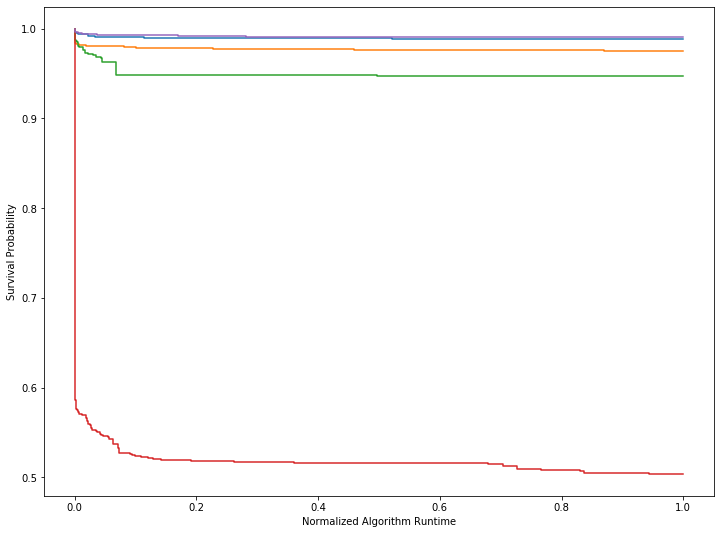

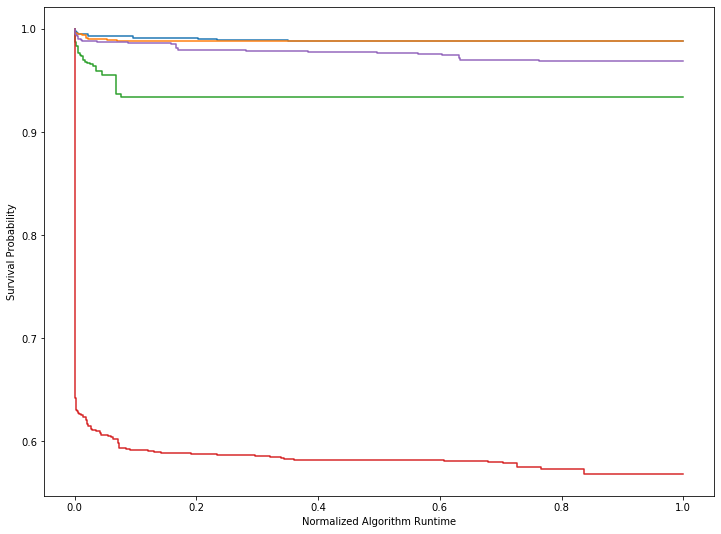

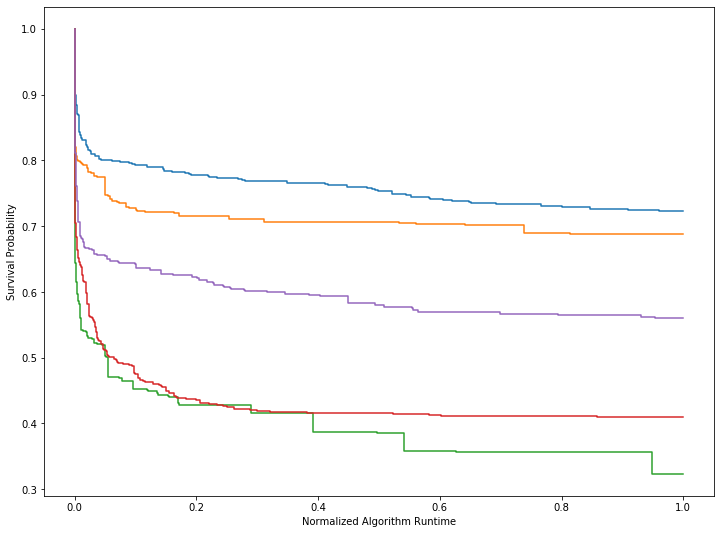

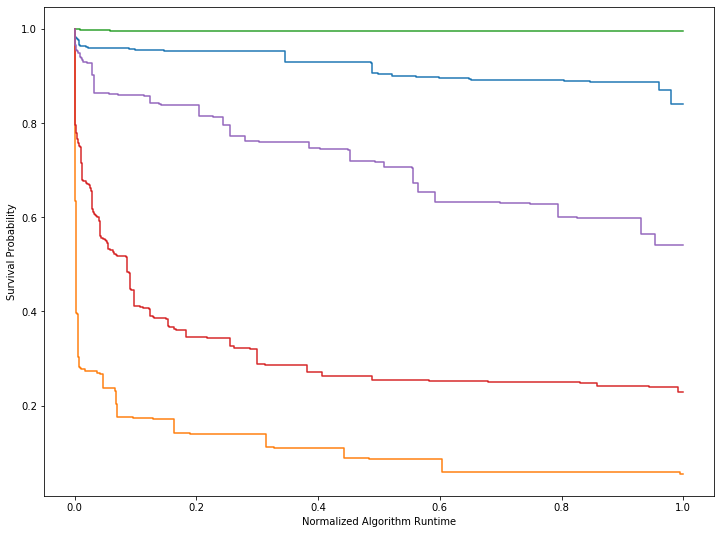

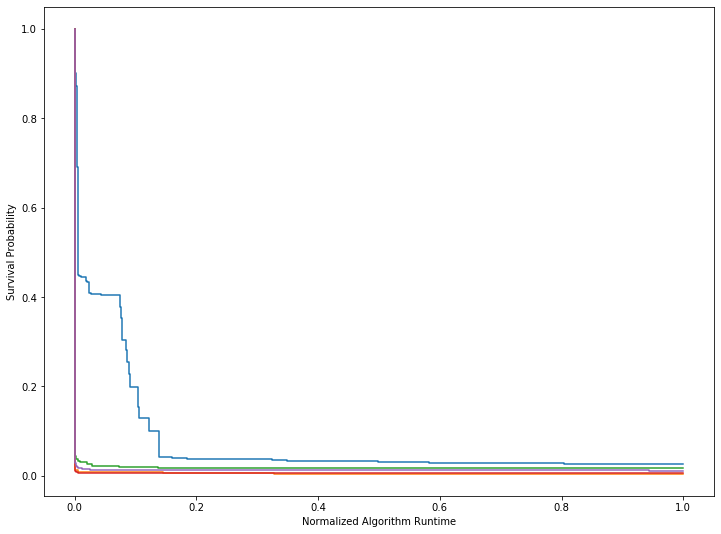

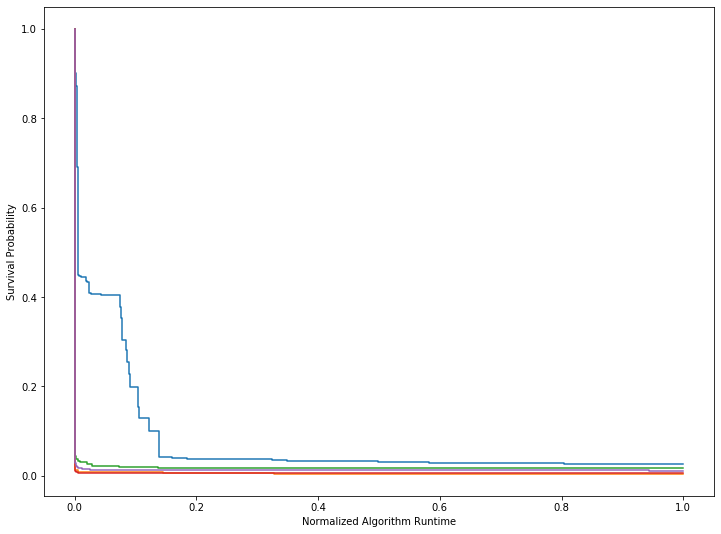

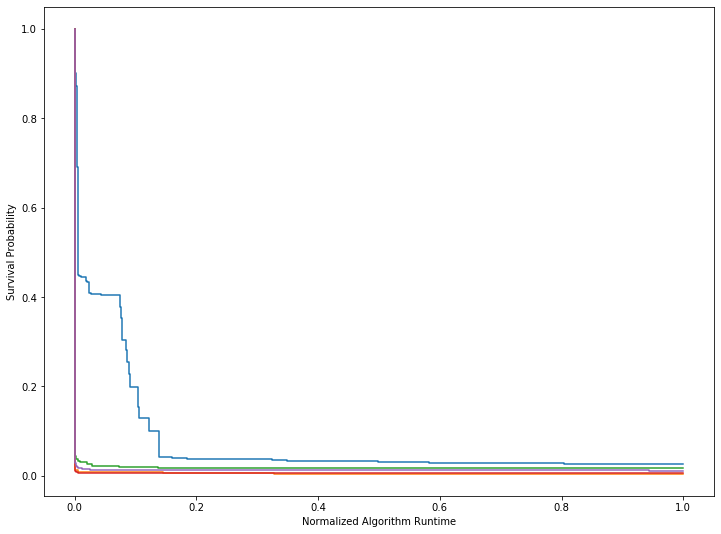

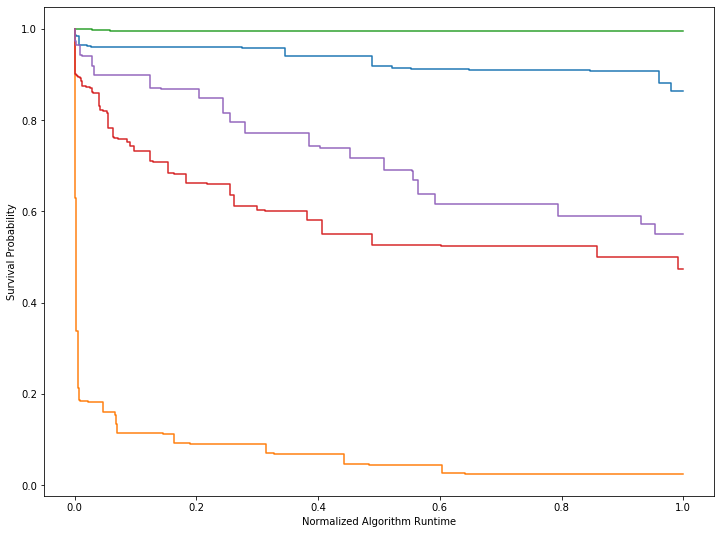

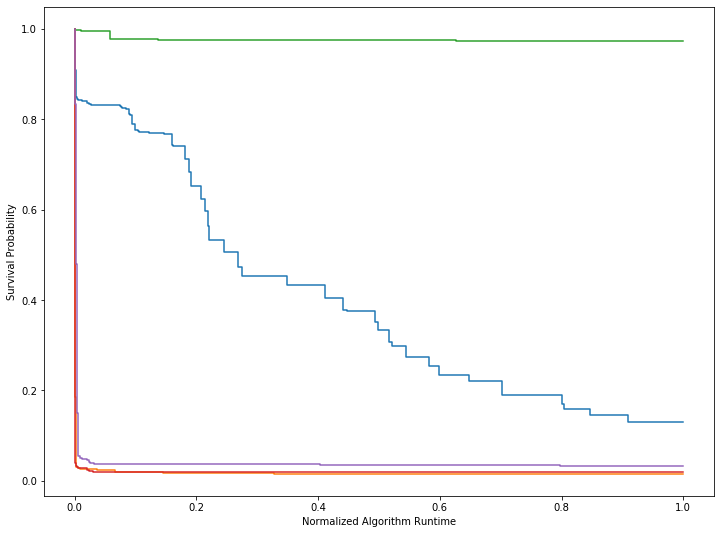

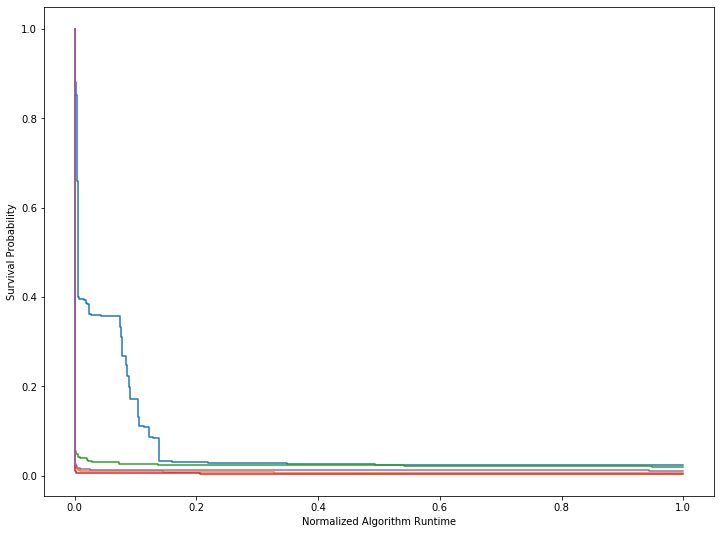

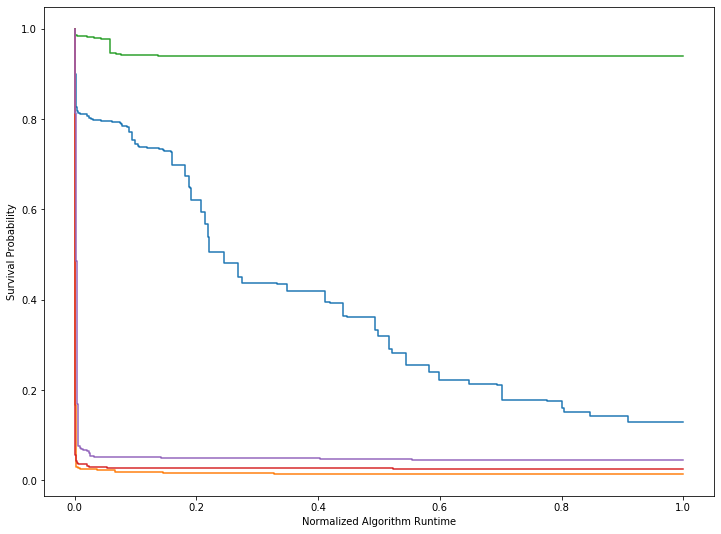

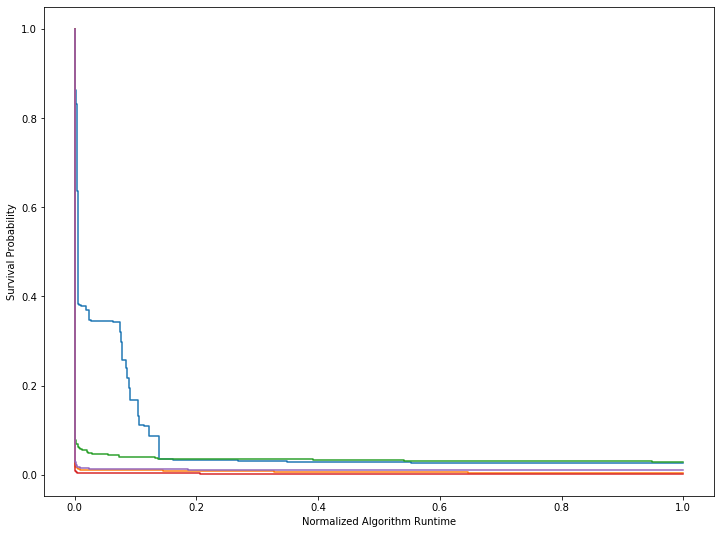

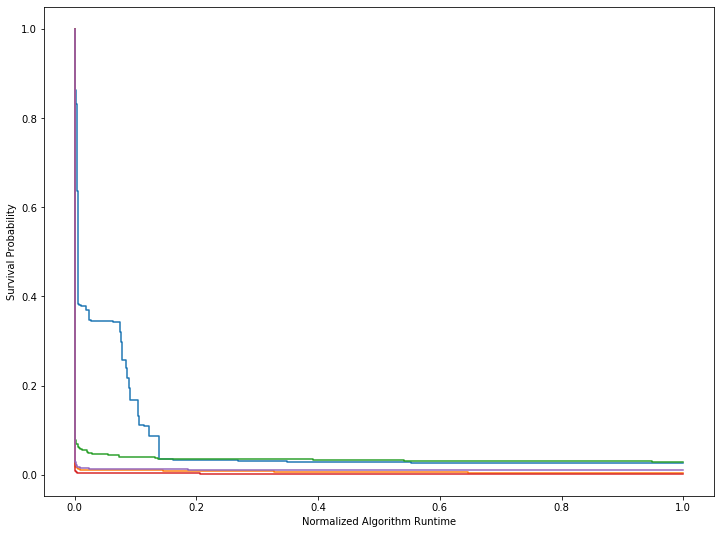

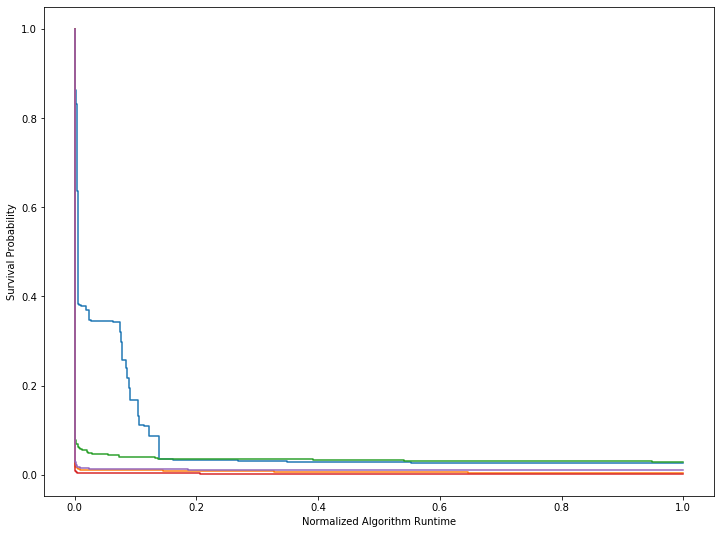

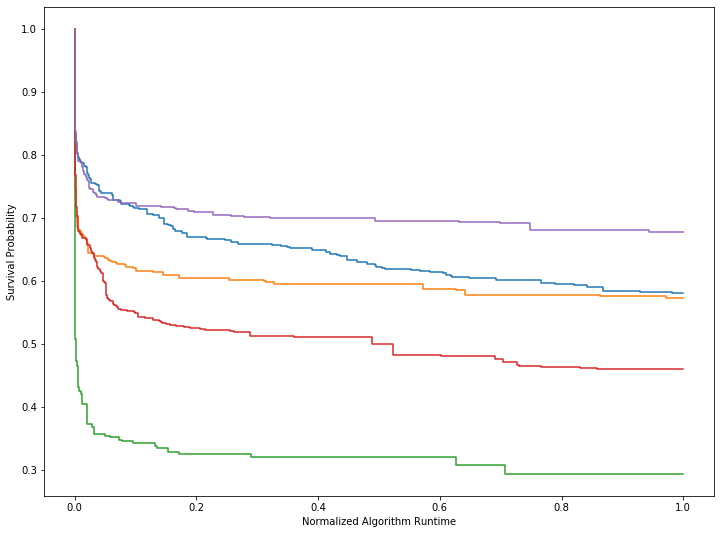

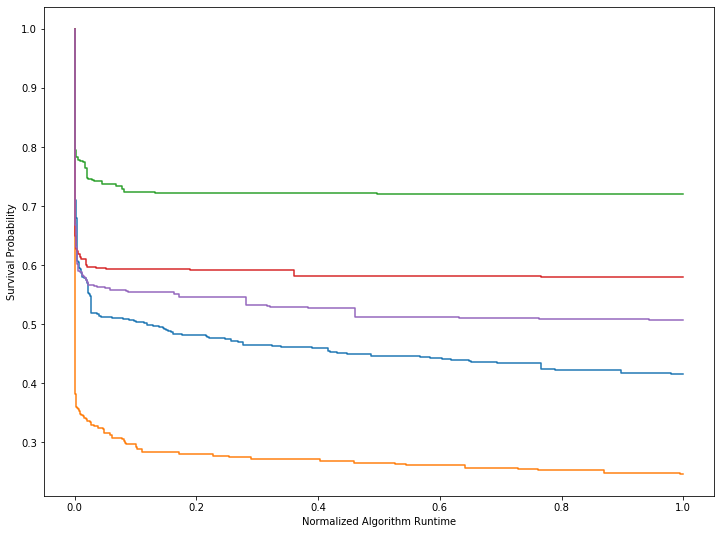

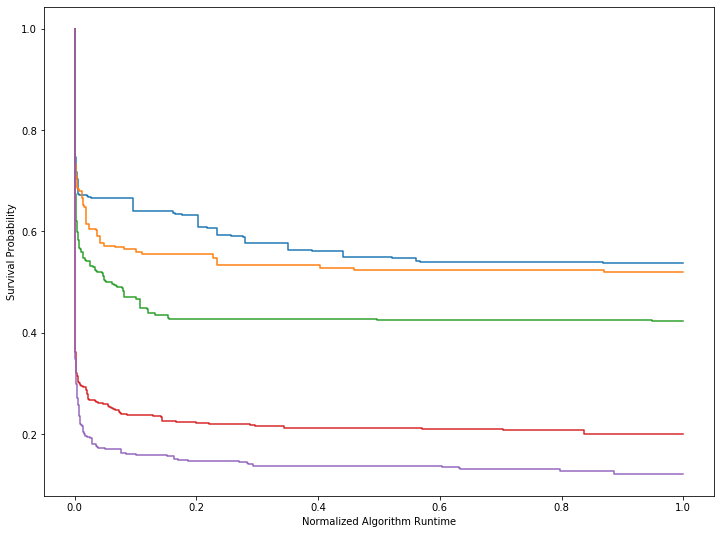

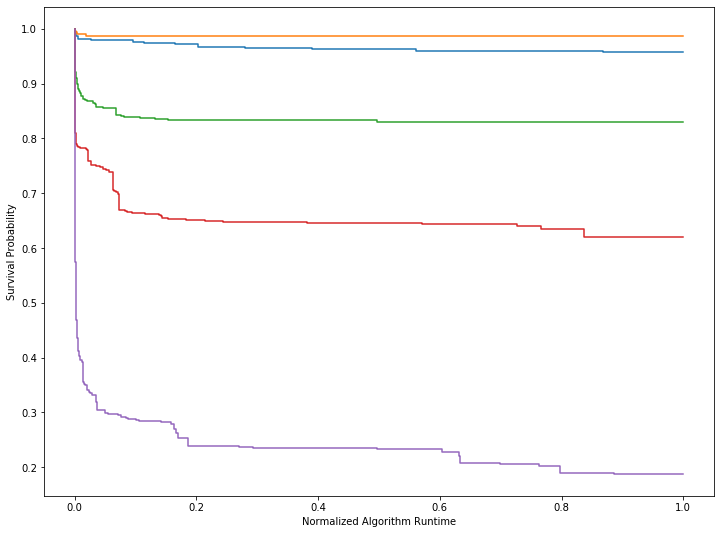

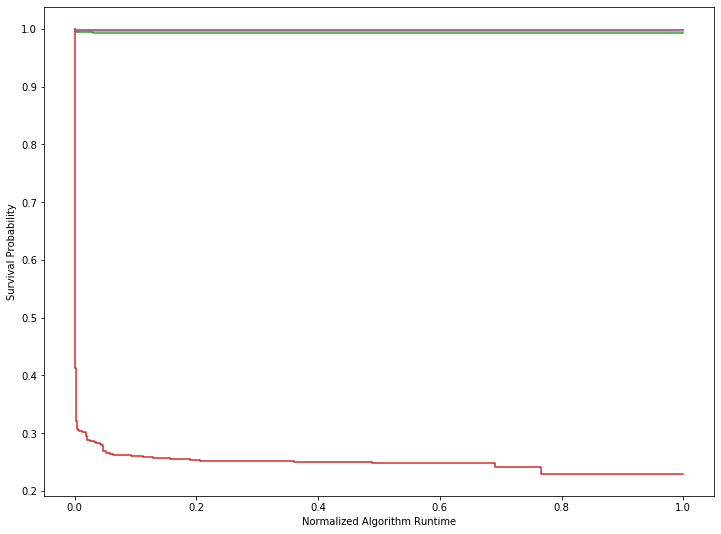

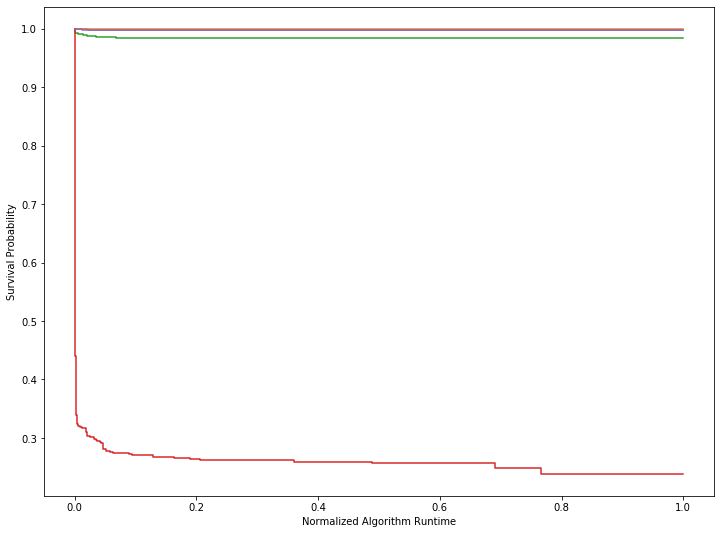

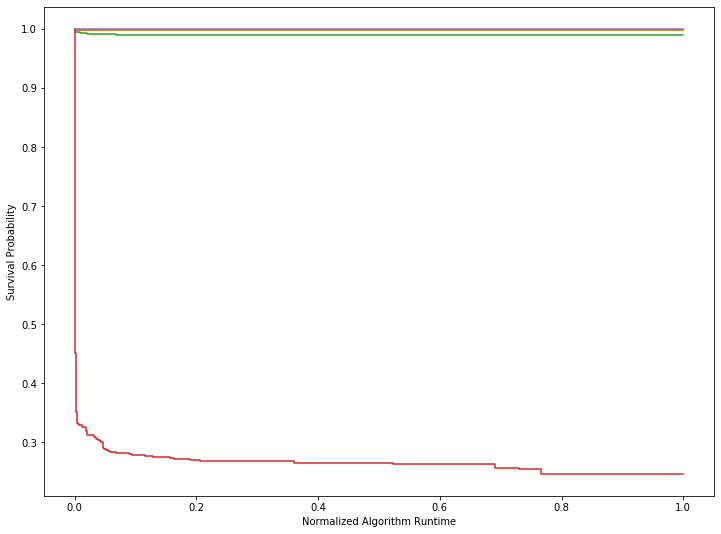

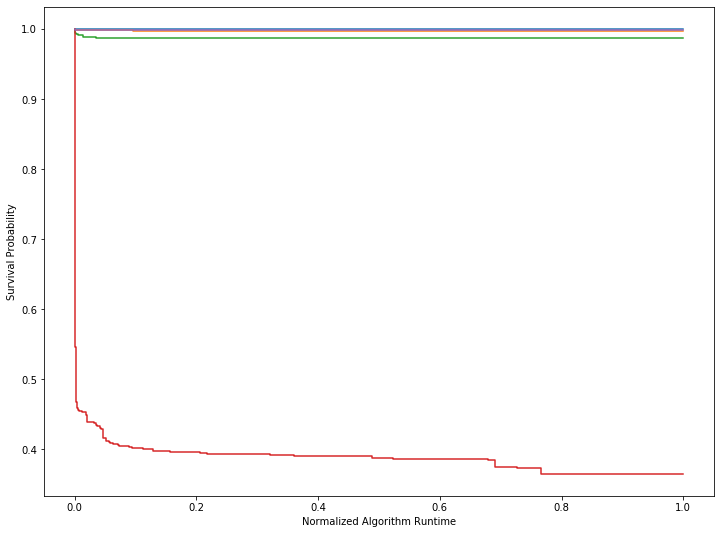

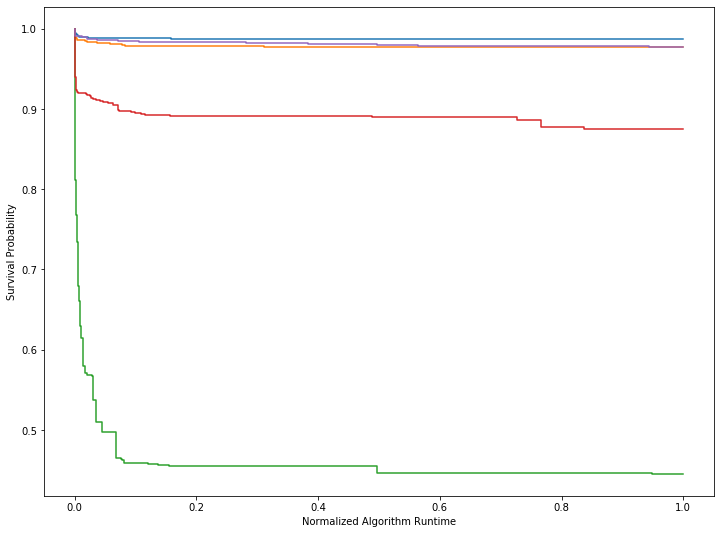

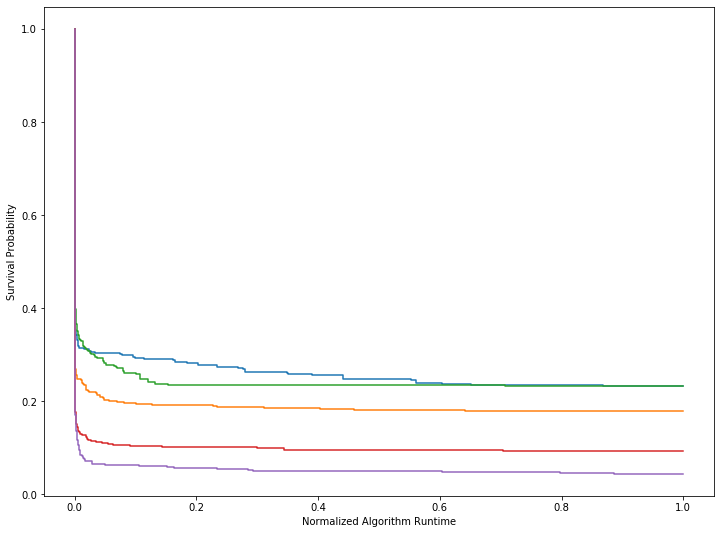

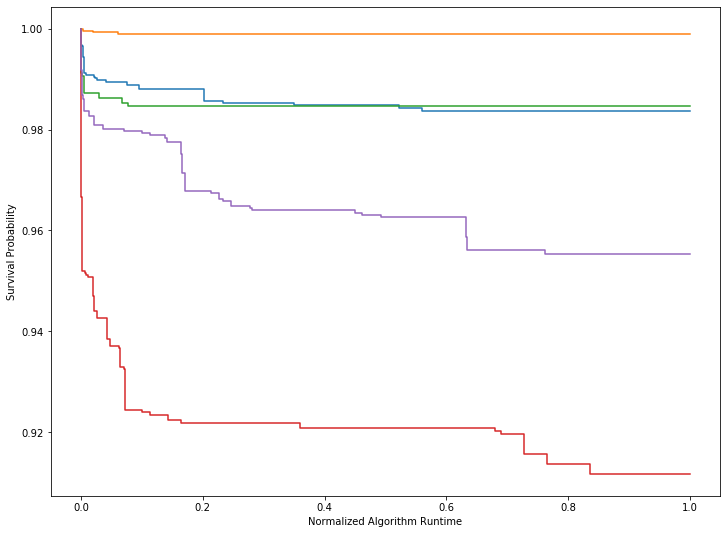

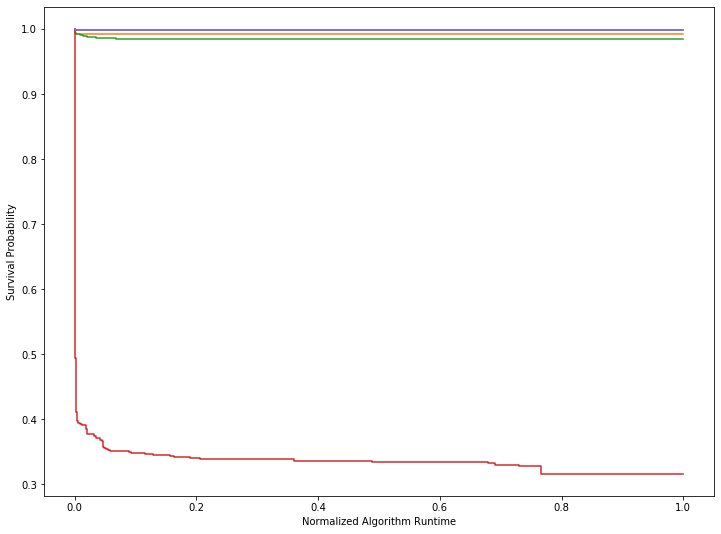

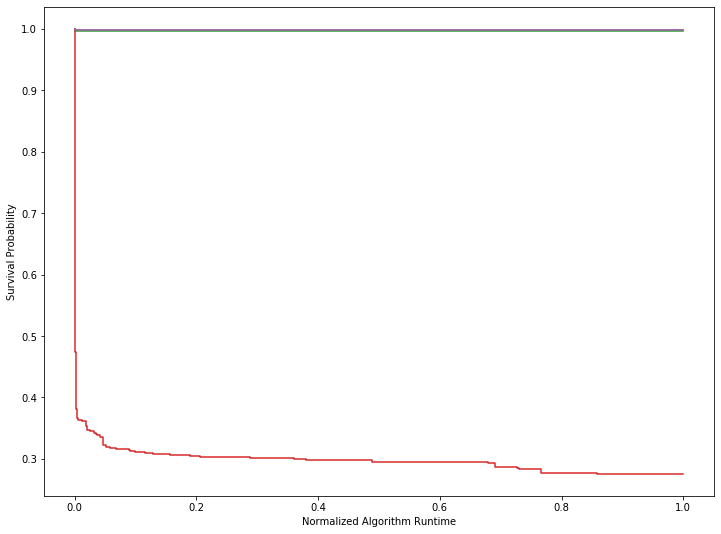

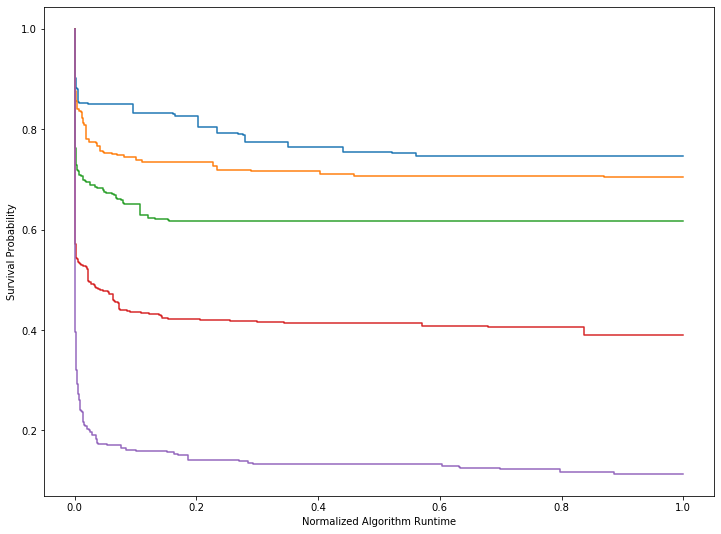

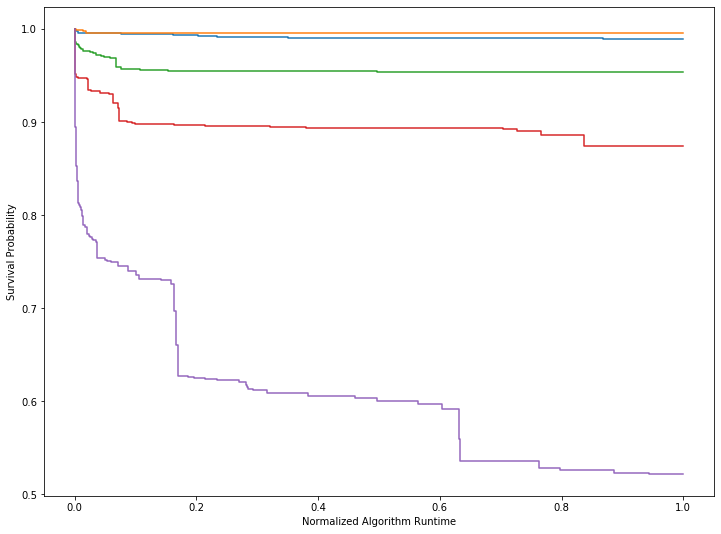

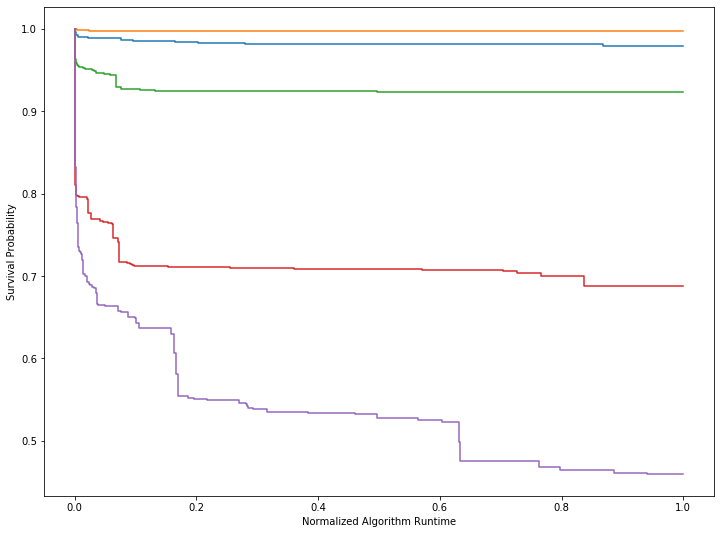

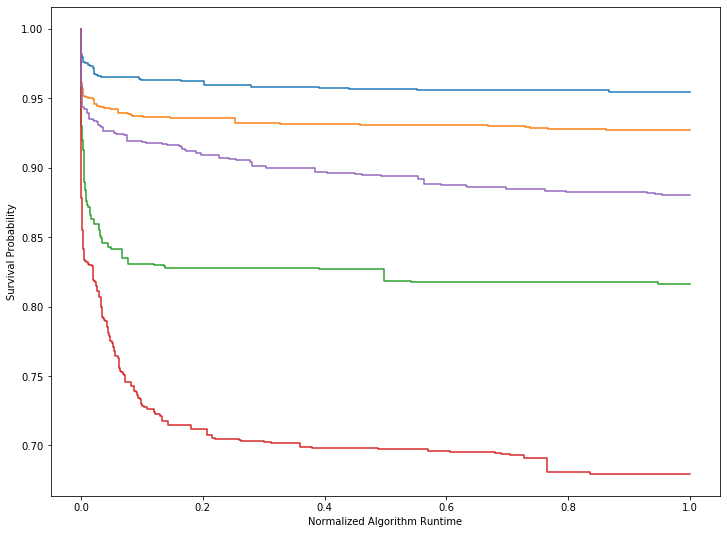

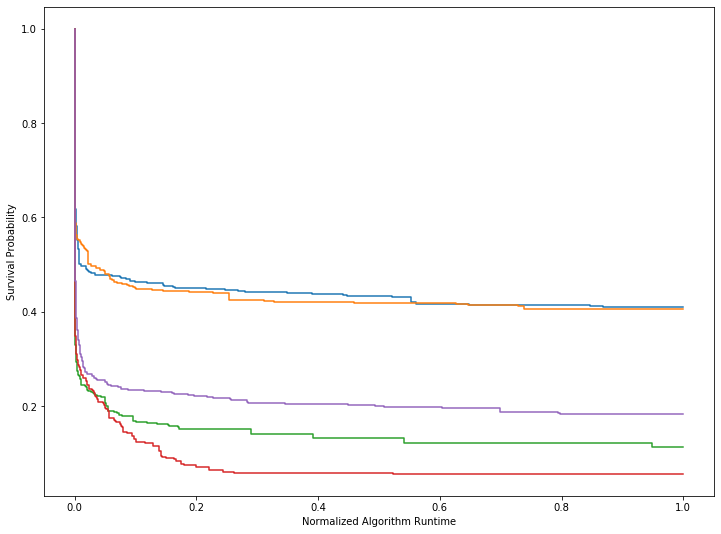

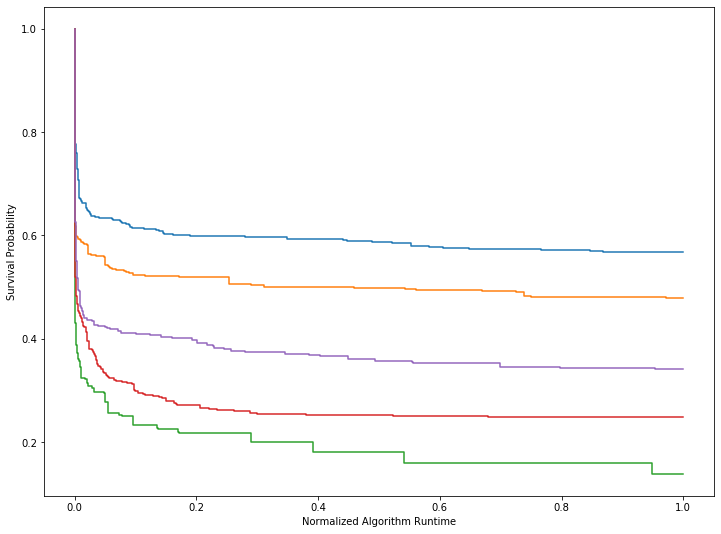

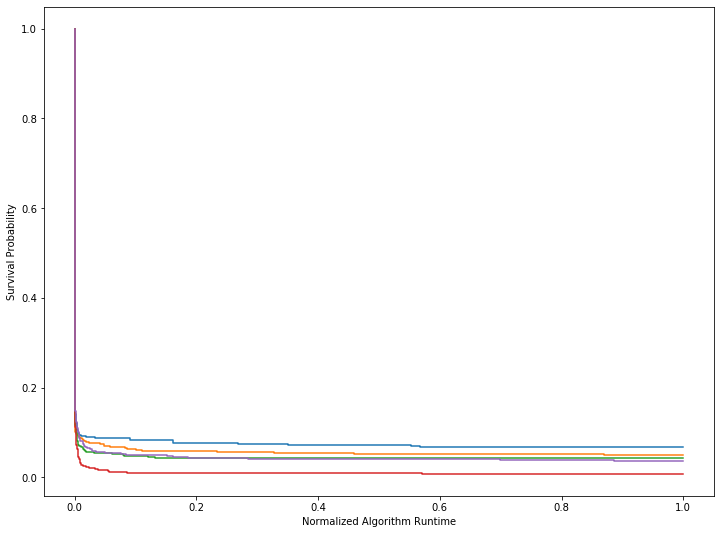

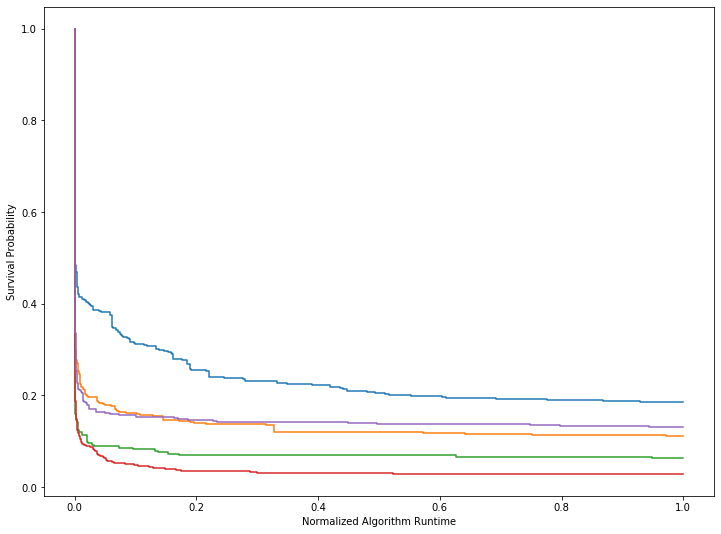

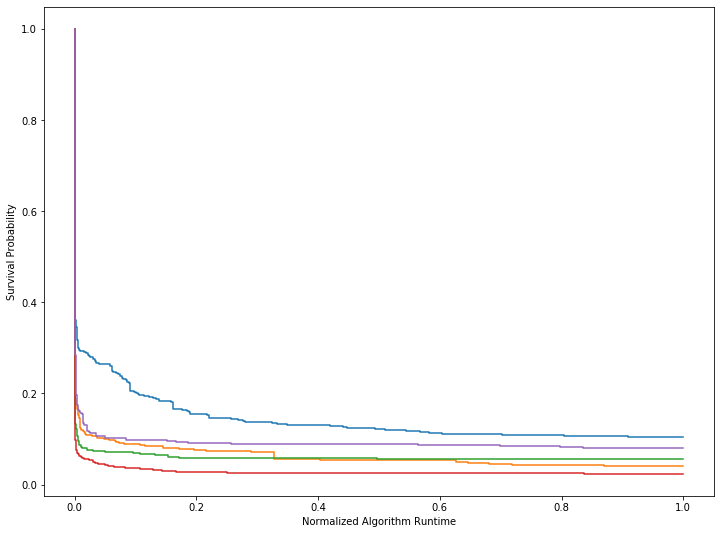

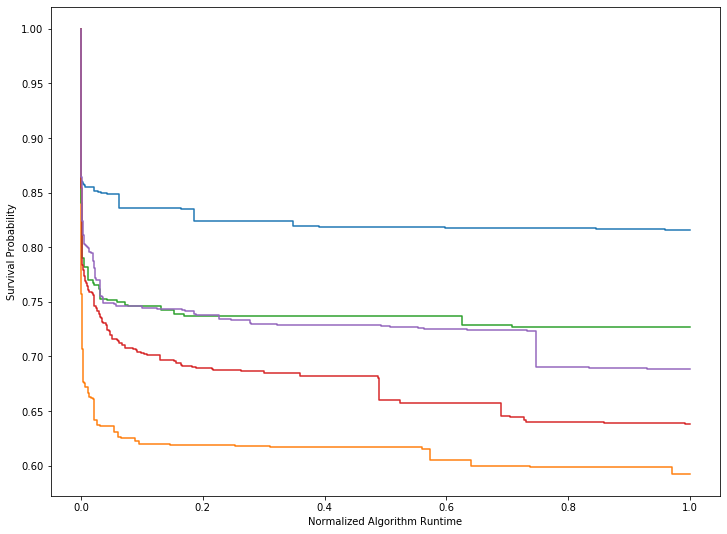

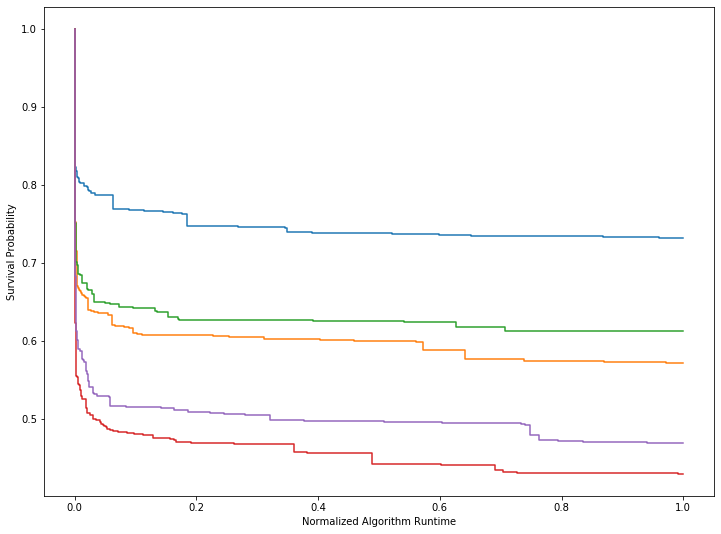

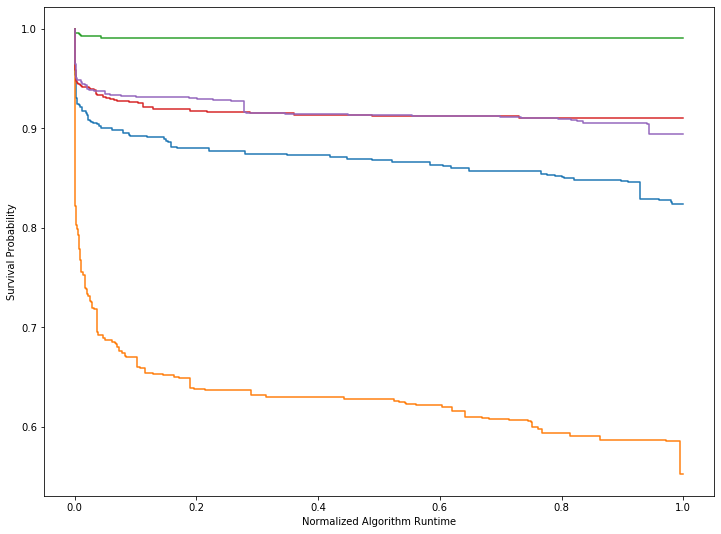

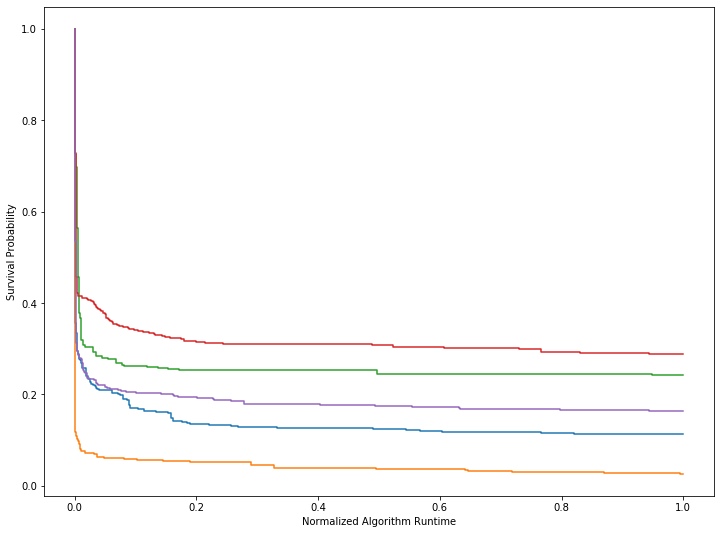

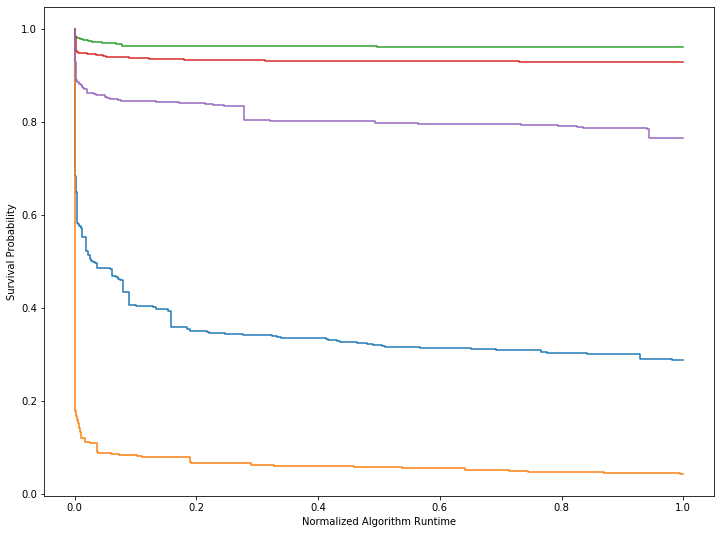

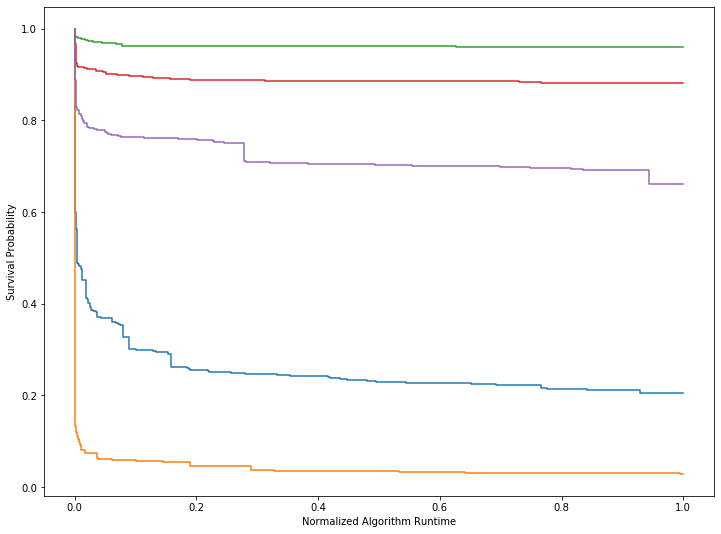

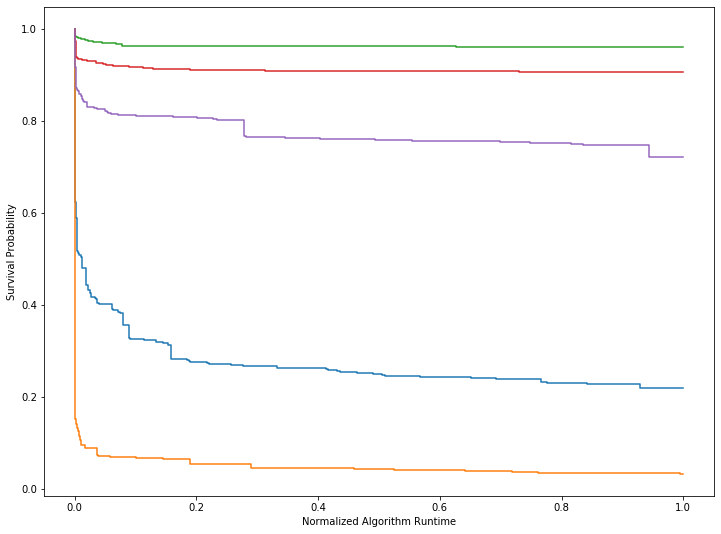

In [6]:
for instance_id in range(len(scenario.instances)):
    EVENT_TIMES, SURVIVAL_FUNCTIONS, cutoff = create_survival_curves(scenario, instance_id)
    plot_survival_funcs(EVENT_TIMES, SURVIVAL_FUNCTIONS, cutoff, save=True, filename=f"Instance_id{instance_id}_survival")

In [ ]:
# instance_id = 6
# for scenario_name in dirlist:
#     scenario = create_scenario(scenario_name, '../../survival_tests/results/workspaces/aslib/')
    
#     EVENT_TIMES, SURVIVAL_FUNCTIONS, cutoff = create_survival_curves(scenario, instance_id)
#     plot_survival_funcs(EVENT_TIMES, SURVIVAL_FUNCTIONS, cutoff)

In [ ]:
# CUTOFF = 10
# SCHEDULE1: List[Tuple[int, float]] = [(1, 2), (2, 6), (3, -1)]
# SCHEDULE2: List[Tuple[int, float]] = [(4, -1)]
# SCHEDULE3: List[Tuple[int, float]] = [(3, 5), (2, 6), (3, -1)]

# event_times = [
#     [1, 3, 5, 7, 9], 
#     [2, 4, 6, 8],
#     [1, 2, 3, 4, 5, 6, 7, 8, 9],
#     [5]
# ]

# survival_functions = [
#     [0.95, 0.9, 0.85, 0.8, 0.75], 
#     [0.8, 0.5, 0.3, 0.1],
#     [0.90, 0.81, 0.72, 0.63, 0.54, 0.45, 0.36, 0.27, 0.18],
#     [0]
# ]

In [ ]:
# e1, s1 = survival_curve_from_schedule(SCHEDULE1, event_times, survival_functions, CUTOFF)
# e2, s2 = survival_curve_from_schedule(SCHEDULE2, event_times, survival_functions, CUTOFF)
# e3, s3 = survival_curve_from_schedule(SCHEDULE3, event_times, survival_functions, CUTOFF)

# es = [e1, e2, e3]
# ss = [s1, s2, s3]
# es, ss = prepare_survival_curves_for_plot(es, ss, CUTOFF)

In [ ]:
# # %matplotlib widget 
# plot_survival_funcs(es, ss, CUTOFF)

Plot the Termination Curves for every Algorithm on the ground truth value

In [ ]:
# import os

# root='../data/aslib_data-master/'
# dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]

In [ ]:
# scenario_name = 'CSP-Minizinc-Time-2016'

In [ ]:
for scenario_name in dirlist:
    scenario = create_scenario(scenario_name, '../../survival_tests/results/workspaces/aslib/')
    _, train_scenario = scenario.get_split()
    cutoff = train_scenario.algorithm_cutoff_time

    event_times, termination_curves = termination_curve_from_train_data(train_scenario.performance_data, cutoff)
    plot_survival_funcs(event_times, termination_curves, cutoff, save=False, filename=scenario_name)

In [ ]:
# %matplotlib widget
# plot_survival_funcs(event_times, termination_curves, cutoff)